### <font color='red'> Project 2

Project Description:
- Use same datasets as Project 1.
- Preprocess data: Explore data and apply data scaling.

Regression Task:
- Apply any two models with bagging and any two models with pasting.
- Apply any two models with adaboost boosting
- Apply one model with gradient boosting
- Apply PCA on data and then apply all the models in project 1 again on data you get from PCA. Compare your results with results in project 2. You don't need to apply all the models twice. Just copy the result table from project 1, prepare similar table for all the models after PCA and compare both tables. Does PCA help in getting better results?
- Apply deep learning models covered in class

Classification Task:
- Apply two voting classifiers - one with hard voting and one with soft voting
- Apply any two models with bagging and any two models with pasting.
- Apply any two models with adaboost boosting
- Apply one model with gradient boosting
- Apply PCA on data and then apply all the models in project 1 again on data you get from PCA. Compare your results with results in project 1. You don't need to apply all the models twice. Just copy the result table from project 1, prepare similar table for all the models after PCA and compare both tables. Does PCA help in getting better results?
- Apply deep learning models covered in class

Deliverables:
- Use markdown to provide inline comments for this project.
- Your outputs should be clearly executed in the notebook i.e. we should not need to rerun the code to obtain the outputs.
- Visualization encouraged.
- If you are submitting two different files, then please only one group member submit both the files. If you submit two files separately from different accounts, it will be submitted as two different attempts.
- If you are submitting two different files, then please follow below naming convetion:
    Project2_Regression_GroupXX_Firstname1_Firstname2.ipynb
    Project2_Classification_GroupXX_Firstname1_Firstname2.ipynb
- If you are submitting single file, then please follow below naming convetion:
    Project2_Both_GroupXX_Firstname1_Firstname2.ipynb

Questions regarding the project:
- We have created a discussion board under Projects folder on e-learning. Create threads over there and post your queries related to project there.
- We will also answer queries there. We will not be answering any project related queries through the mail.

#### Importing  libraries:

In [1]:
#Importing  libraries:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import mglearn

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from math import sqrt
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from  sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
from  sklearn.linear_model import Ridge
from  sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import LinearSVR
from  sklearn.preprocessing  import PolynomialFeatures
from sklearn.svm import SVR

#### importing the data

In [2]:
# importing the data
data_audit = pd.read_csv('audit_risk.csv')
data_risk = pd.read_csv('trial.csv')

#### checking the head of audit data

In [3]:
data_audit.head()

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
0,3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,...,0.4,0,0.2,0.0,2.4,8.574,0.4,0.5,1.7148,1
1,3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,...,0.4,0,0.2,0.0,2.0,2.554,0.4,0.5,0.5108,0
2,3.89,6,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,...,0.4,0,0.2,0.0,2.0,1.548,0.4,0.5,0.3096,0
3,3.89,6,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6.0,...,0.4,0,0.2,0.0,4.4,17.530,0.4,0.5,3.5060,1
4,3.89,6,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,...,0.4,0,0.2,0.0,2.0,1.416,0.4,0.5,0.2832,0


In [4]:
# checking the head of risk data
data_risk.head()

,Sector_score,LOCATION_ID,PARA_A,SCORE_A,PARA_B,SCORE_B,TOTAL,numbers,Marks,Money_Value,MONEY_Marks,District,Loss,LOSS_SCORE,History,History_score,Score,Risk
0,3.89,23,4.18,6,2.50,2,6.68,5.0,2,3.38,2,2,0,2,0,2,2.4,1
1,3.89,6,0.00,2,4.83,2,4.83,5.0,2,0.94,2,2,0,2,0,2,2.0,0
2,3.89,6,0.51,2,0.23,2,0.74,5.0,2,0.00,2,2,0,2,0,2,2.0,0
3,3.89,6,0.00,2,10.80,6,10.80,6.0,6,11.75,6,2,0,2,0,2,4.4,1
4,3.89,6,0.00,2,0.08,2,0.08,5.0,2,0.00,2,2,0,2,0,2,2.0,0


In [5]:
# checking the shape of risk dataset
data_risk.shape

(776, 18)

In [6]:
# checking the shape of audit dataset
data_audit.shape

(776, 27)

In [7]:
# storing the columns of datasets by creating a seperate variable
col_risk = data_risk.columns
col_aud = data_audit.columns

In [8]:
# printing data info for checking any missing columns in the data
data_audit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 27 columns):
Sector_score      776 non-null float64
LOCATION_ID       776 non-null object
PARA_A            776 non-null float64
Score_A           776 non-null float64
Risk_A            776 non-null float64
PARA_B            776 non-null float64
Score_B           776 non-null float64
Risk_B            776 non-null float64
TOTAL             776 non-null float64
numbers           776 non-null float64
Score_B.1         776 non-null float64
Risk_C            776 non-null float64
Money_Value       775 non-null float64
Score_MV          776 non-null float64
Risk_D            776 non-null float64
District_Loss     776 non-null int64
PROB              776 non-null float64
RiSk_E            776 non-null float64
History           776 non-null int64
Prob              776 non-null float64
Risk_F            776 non-null float64
Score             776 non-null float64
Inherent_Risk     776 non-null float64
CON

In [9]:
# printing data info for checking any missing or non-consistent columns in the data
data_risk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 18 columns):
Sector_score     776 non-null float64
LOCATION_ID      776 non-null object
PARA_A           776 non-null float64
SCORE_A          776 non-null int64
PARA_B           776 non-null float64
SCORE_B          776 non-null int64
TOTAL            776 non-null float64
numbers          776 non-null float64
Marks            776 non-null int64
Money_Value      775 non-null float64
MONEY_Marks      776 non-null int64
District         776 non-null int64
Loss             776 non-null int64
LOSS_SCORE       776 non-null int64
History          776 non-null int64
History_score    776 non-null int64
Score            776 non-null float64
Risk             776 non-null int64
dtypes: float64(7), int64(10), object(1)
memory usage: 109.2+ KB


In [10]:
# Assigning mean value of the column for missing rows
data_audit.loc[:,['Money_Value']]=data_audit.loc[:,['Money_Value']].fillna(data_audit.loc[:,['Money_Value']].mean())
data_risk.loc[:,['Money_Value']]=data_risk.loc[:,['Money_Value']].fillna(data_risk.loc[:,['Money_Value']].mean())

In [11]:
# checking for same column names in both datasets for joining data frames
q = []
for i in col_risk:
    if i in col_aud:q.append(i)
q

['Sector_score',
 'LOCATION_ID',
 'PARA_A',
 'PARA_B',
 'TOTAL',
 'numbers',
 'Money_Value',
 'History',
 'Score',
 'Risk']

In [12]:
# confirming for same column names for joining datasets
for i in q:
    print(data_risk[i].equals(data_audit[i]))

True
True
True
True
True
True
True
True
True
False


In [13]:
# printing all unique elements in the data frames for thorough verification of missing or inconsistent data values in 
# data_audit.
unique_name = list()
for i in col_aud:
    a = data_audit[i].unique()
    unique_name.append(a)
for i in range(0,len(col_aud)):
    print(col_aud[i],':\n')
    print(np.sort(unique_name[i]),'\n')
    print(len(np.unique(unique_name[i])),'\n')

Sector_score :

[ 1.85  1.99  2.34  2.36  2.37  2.72  3.41  3.89 15.56 17.68 21.61 55.57
 59.85] 

13 

LOCATION_ID :

['1' '11' '12' '13' '14' '15' '16' '17' '18' '19' '2' '20' '21' '22' '23'
 '24' '25' '27' '28' '29' '3' '30' '31' '32' '33' '34' '35' '36' '37' '38'
 '39' '4' '40' '41' '42' '43' '44' '5' '6' '7' '8' '9' 'LOHARU' 'NUH'
 'SAFIDON'] 

45 

PARA_A :

[0.000e+00 6.000e-04 1.000e-02 2.000e-02 3.000e-02 4.000e-02 5.000e-02
 6.000e-02 7.000e-02 9.000e-02 1.000e-01 1.100e-01 1.400e-01 1.500e-01
 1.700e-01 1.800e-01 1.900e-01 2.000e-01 2.100e-01 2.300e-01 2.400e-01
 2.500e-01 2.600e-01 2.700e-01 2.800e-01 2.900e-01 3.000e-01 3.100e-01
 3.200e-01 3.300e-01 3.400e-01 3.600e-01 3.700e-01 3.800e-01 3.900e-01
 4.000e-01 4.100e-01 4.200e-01 4.300e-01 4.400e-01 4.500e-01 4.600e-01
 4.700e-01 4.800e-01 4.900e-01 5.000e-01 5.100e-01 5.200e-01 5.300e-01
 5.400e-01 5.500e-01 5.600e-01 5.700e-01 5.800e-01 5.900e-01 6.000e-01
 6.100e-01 6.200e-01 6.300e-01 6.400e-01 6.500e-01 6.600e-01 6.70

In [14]:
unique_name = list()
for i in col_risk:
    a = data_risk[i].unique()
    unique_name.append(a)
for i in range(0,len(col_risk)):
    print(col_risk[i],':\n')
    print(np.sort(unique_name[i]),'\n')
    print(len(np.unique(unique_name[i])),'\n')

Sector_score :

[ 1.85  1.99  2.34  2.36  2.37  2.72  3.41  3.89 15.56 17.68 21.61 55.57
 59.85] 

13 

LOCATION_ID :

['1' '11' '12' '13' '14' '15' '16' '17' '18' '19' '2' '20' '21' '22' '23'
 '24' '25' '27' '28' '29' '3' '30' '31' '32' '33' '34' '35' '36' '37' '38'
 '39' '4' '40' '41' '42' '43' '44' '5' '6' '7' '8' '9' 'LOHARU' 'NUH'
 'SAFIDON'] 

45 

PARA_A :

[0.000e+00 6.000e-04 1.000e-02 2.000e-02 3.000e-02 4.000e-02 5.000e-02
 6.000e-02 7.000e-02 9.000e-02 1.000e-01 1.100e-01 1.400e-01 1.500e-01
 1.700e-01 1.800e-01 1.900e-01 2.000e-01 2.100e-01 2.300e-01 2.400e-01
 2.500e-01 2.600e-01 2.700e-01 2.800e-01 2.900e-01 3.000e-01 3.100e-01
 3.200e-01 3.300e-01 3.400e-01 3.600e-01 3.700e-01 3.800e-01 3.900e-01
 4.000e-01 4.100e-01 4.200e-01 4.300e-01 4.400e-01 4.500e-01 4.600e-01
 4.700e-01 4.800e-01 4.900e-01 5.000e-01 5.100e-01 5.200e-01 5.300e-01
 5.400e-01 5.500e-01 5.600e-01 5.700e-01 5.800e-01 5.900e-01 6.000e-01
 6.100e-01 6.200e-01 6.300e-01 6.400e-01 6.500e-01 6.600e-01 6.70

 1.48230e+02 1.91360e+02 1.26891e+03] 

471 

numbers :

[5.  5.5 6.  6.5 9. ] 

5 

Marks :

[2 4 6] 

3 

Money_Value :

[0.0000000e+00 7.0000000e-03 1.0000000e-02 2.0000000e-02 3.0000000e-02
 4.0000000e-02 5.0000000e-02 6.0000000e-02 7.0000000e-02 8.0000000e-02
 9.0000000e-02 1.0000000e-01 1.1000000e-01 1.2000000e-01 1.3000000e-01
 1.4000000e-01 1.5000000e-01 1.6000000e-01 1.7000000e-01 1.8000000e-01
 1.9000000e-01 2.0000000e-01 2.1000000e-01 2.2000000e-01 2.3000000e-01
 2.4000000e-01 2.5000000e-01 2.8000000e-01 2.9000000e-01 3.1000000e-01
 3.2000000e-01 3.3000000e-01 3.5000000e-01 3.6000000e-01 3.7000000e-01
 3.9000000e-01 4.0000000e-01 4.2000000e-01 4.3000000e-01 4.4000000e-01
 4.5000000e-01 4.7000000e-01 4.9000000e-01 5.1000000e-01 5.2000000e-01
 5.7000000e-01 5.8000000e-01 5.9000000e-01 6.0000000e-01 6.3000000e-01
 6.4000000e-01 6.5000000e-01 6.7000000e-01 6.8000000e-01 6.9000000e-01
 7.0000000e-01 7.1000000e-01 7.2000000e-01 7.3000000e-01 7.4000000e-01
 7.6000000e-01 7.9000000e

##### we notice that Location ID has three values, 'LOHARU', 'NUH','SAFIDON', that needs to be converted into categories. By observing the data, we are trying to decode the locations with the missing pattern. 'LOHARU'] = '10'; 'NUH' = '26'; 'SAFIDON' = '45'

In [15]:
#Assigning  location IDs with the above mentioned numbers 
data_audit['LOCATION_ID'].loc[data_audit['LOCATION_ID']=='LOHARU'] = '10'
data_audit['LOCATION_ID'].loc[data_audit['LOCATION_ID']=='NUH'] = '26'
data_audit['LOCATION_ID'].loc[data_audit['LOCATION_ID']=='SAFIDON'] = '45'
data_risk['LOCATION_ID'].loc[data_risk['LOCATION_ID']=='LOHARU'] = '10'
data_risk['LOCATION_ID'].loc[data_risk['LOCATION_ID']=='NUH'] = '26'
data_risk['LOCATION_ID'].loc[data_risk['LOCATION_ID']=='SAFIDON'] = '45'

In [16]:
np.unique(data_audit[['LOCATION_ID']])

array(['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19',
       '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29',
       '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39',
       '4', '40', '41', '42', '43', '44', '45', '5', '6', '7', '8', '9'],
      dtype=object)

In [17]:
np.unique(data_risk[['LOCATION_ID']])

array(['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19',
       '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29',
       '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39',
       '4', '40', '41', '42', '43', '44', '45', '5', '6', '7', '8', '9'],
      dtype=object)

In [18]:
#dropping duplicate rows
data_audit1 = data_audit.drop_duplicates()
data_risk1=data_risk.drop_duplicates()

In [19]:
# join the dataframes
new_df = pd.merge(data_audit1, data_risk1,on=['Sector_score', 'LOCATION_ID', 'PARA_A', 'PARA_B', 'TOTAL', 'numbers','Money_Value','History','Score'])

In [20]:
new_df.columns

Index(['Sector_score', 'LOCATION_ID', 'PARA_A', 'Score_A', 'Risk_A', 'PARA_B',
       'Score_B', 'Risk_B', 'TOTAL', 'numbers', 'Score_B.1', 'Risk_C',
       'Money_Value', 'Score_MV', 'Risk_D', 'District_Loss', 'PROB', 'RiSk_E',
       'History', 'Prob', 'Risk_F', 'Score', 'Inherent_Risk', 'CONTROL_RISK',
       'Detection_Risk', 'Audit_Risk', 'Risk_x', 'SCORE_A', 'SCORE_B', 'Marks',
       'MONEY_Marks', 'District', 'Loss', 'LOSS_SCORE', 'History_score',
       'Risk_y'],
      dtype='object')

In [21]:
# finding the columns that are linear transform of each other

print(new_df['Score_MV'].equals(new_df['MONEY_Marks']/10))
print(new_df['PROB'].equals(new_df['LOSS_SCORE']/10))
print(new_df['Prob'].equals(new_df['History_score']/10))
print(new_df['District_Loss'].equals(new_df['District']))
print(new_df['Score_B.1'].equals(new_df['Marks']/10))
print(new_df['Score_A'].equals(new_df['SCORE_A']/10))
print(new_df['Score_B'].equals(new_df['SCORE_B']/10))

True
True
True
True
True
True
True


###### We have multiple derived columns in the dataset, while some of these derived columns can be detected using correlation others can be eliminated based on the information we got from the reading source. We are using a correlation of greater than 0.9 which is a standard for checking multicollinearity. "First, select the level of the correlation coefficient that represents a problem is arbitrary. While multicollinearity is almost certain to be a problem with correlation coefficients over 0.9, it may occur at lower levels.

###### We can see from the head of data that Risk_E+Risk_F is equal to control risk and Risk_A+Risk_B+Risk_C+Risk_D+Risk_E+Risk_F is equal to inherent risk. So we can drop these two columns.

###### Detection risk is 0.5 for all rows, since there is no variability in the column, this can be dropped.

###### On initial glimpse we see that there are many columns which are just scaled down versions of these columns or there names were different in the two files.

###### Drop one of the two columns and inherent risk and control risk

In [22]:
# dropping the linearly transformed columns.
new_df1=new_df.drop(['Score_MV','PROB','Prob','Detection_Risk','LOCATION_ID','District_Loss','Score_B.1','SCORE_A','SCORE_B','Inherent_Risk','CONTROL_RISK'],axis=1)

In [23]:
# Detecting linearly transformed columns
District = new_df1['District']
new_df1.drop(labels=['District'], axis=1,inplace = True)
new_df1.insert(0, 'District', District)
cor = new_df1.corr()
corr_matrix = cor.abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

In [24]:
# generating correlation matrix
upper

,District,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,Risk_F,Score,Audit_Risk,Risk_x,Marks,MONEY_Marks,Loss,LOSS_SCORE,History_score,Risk_y
District,NaN,0.109003,0.127700,0.087413,0.127310,0.082933,0.006549,0.083129,0.093308,0.125199,...,0.070687,0.209063,0.200204,0.399125,0.150658,0.080284,0.036170,0.055227,0.083839,0.312959
Sector_score,NaN,NaN,0.212488,0.417980,0.215317,0.130719,0.210417,0.128688,0.150939,0.149438,...,0.101534,0.329635,0.090077,0.391299,0.167585,0.313937,0.081408,0.084987,0.134424,0.364573
PARA_A,NaN,NaN,NaN,0.494335,0.999277,0.160693,0.355618,0.160618,0.265743,0.132210,...,0.102896,0.423919,0.218880,0.376958,0.138827,0.283084,0.044306,0.042588,0.171202,0.288588
Score_A,NaN,NaN,NaN,NaN,0.502990,0.247950,0.568595,0.246756,0.295824,0.240587,...,0.149330,0.717350,0.200587,0.617862,0.272179,0.474807,0.091572,0.091817,0.263507,0.668401
Risk_A,NaN,NaN,NaN,NaN,NaN,0.164133,0.360367,0.164016,0.269016,0.134158,...,0.105559,0.430160,0.220754,0.383592,0.141426,0.288129,0.044863,0.042701,0.174835,0.286694
PARA_B,NaN,NaN,NaN,NaN,NaN,NaN,0.346575,0.999936,0.994109,0.209116,...,0.195534,0.396568,0.887734,0.256317,0.230030,0.313450,0.044251,0.041972,0.315925,0.160900
Score_B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.347208,0.378068,0.275868,...,0.169967,0.900613,0.206814,0.634668,0.311858,0.564819,0.097432,0.091058,0.308031,0.511017
Risk_B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.994035,0.208873,...,0.194788,0.396414,0.887508,0.254608,0.229745,0.312027,0.044558,0.042309,0.315773,0.159674
TOTAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.216765,...,0.201559,0.432972,0.888060,0.291130,0.237256,0.336096,0.048197,0.045786,0.325670,0.188507
numbers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.201786,0.502386,0.220874,0.307357,0.908033,0.445663,0.002188,0.035115,0.208747,0.195569


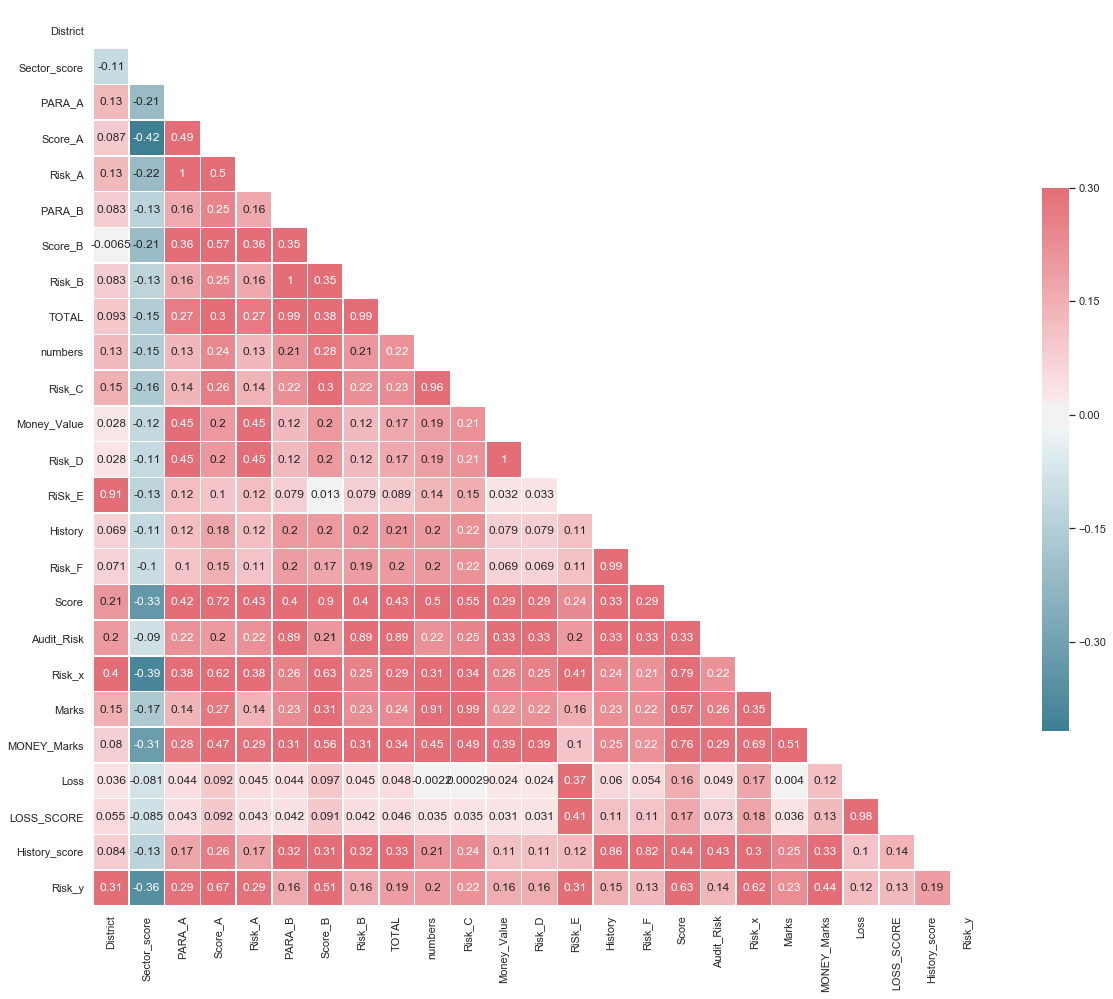

In [25]:
# preparing heat map of correlation

sns.set(style="white")


# Calaculating the correlation matrix
corr = new_df1.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [26]:
# columns to drop from correlation matrix
to_drop

['Risk_A',
 'Risk_B',
 'TOTAL',
 'Risk_C',
 'Risk_D',
 'RiSk_E',
 'Risk_F',
 'Score',
 'Marks',
 'LOSS_SCORE']

In [27]:
# dropping the columns
new_df2= new_df1.drop(to_drop,axis=1)

In [28]:
# copying dataframe to df
df=new_df2
df.shape

(763, 15)

In [29]:
# dropping outliers from the data
df.drop(df[df['PARA_B']>1000].index,inplace=True)
df.shape

(762, 15)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000010E201D668>,
      dtype=object)

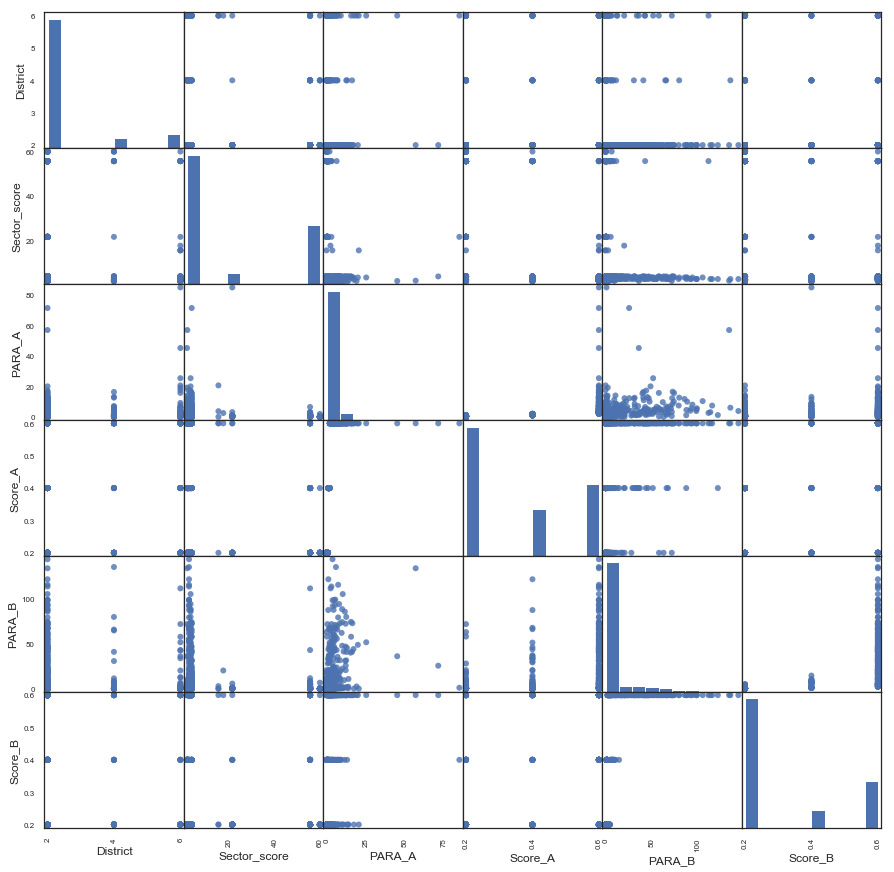

In [30]:
# generating scatter plot for each variable against target variable and spliting the data into response variable and explanatory variables.
from pandas.plotting import scatter_matrix
X = df[['District', 'Sector_score', 'PARA_A', 'Score_A', 'PARA_B', 'Score_B',
       'numbers', 'Money_Value', 'History', 
       'MONEY_Marks', 'Loss', 'History_score']]
y = df[['Audit_Risk']]
attributes = X.columns[0:6]
scatter_matrix(X[attributes], figsize = (15,15), alpha = 0.8, marker = 'O')

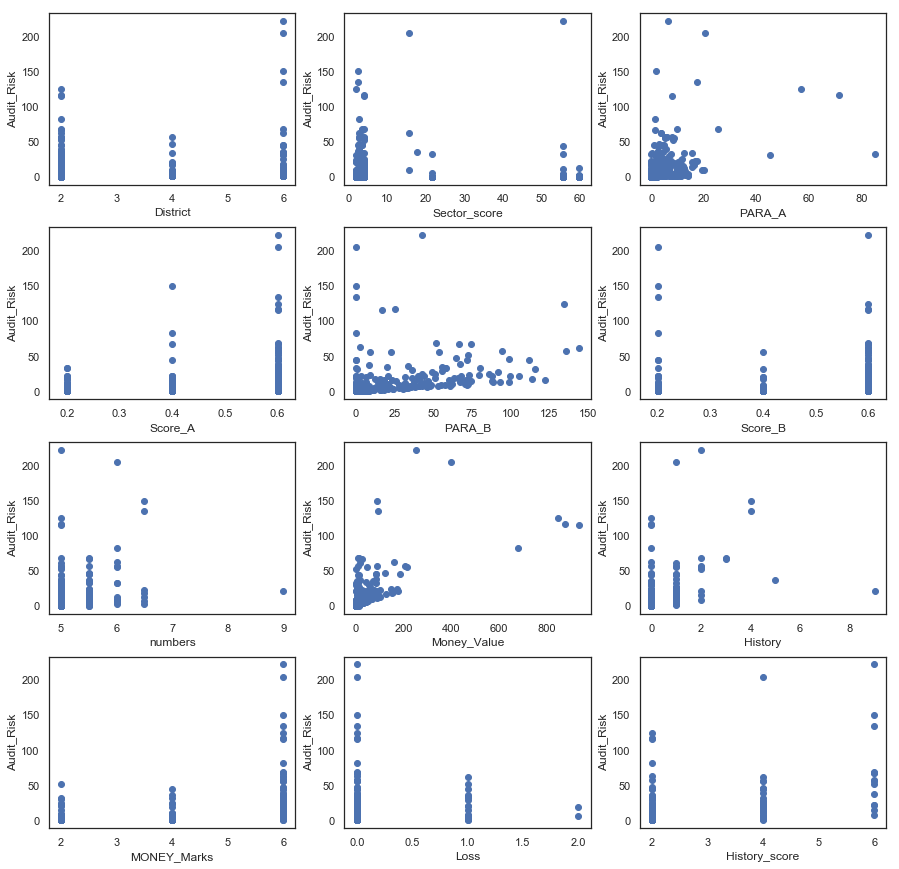

In [31]:
# generating scatter plot for each variable against target variable
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15,15))

columns = 3
rows = 4

for i in range(1, 13):
    if(i<13):
        fig.add_subplot(rows, columns, i)
        plt.scatter(x=X.columns[i-1], y='Audit_Risk',data=df)
        plt.xlabel(X.columns[i-1])
        plt.ylabel('Audit_Risk')
        plt.subplots_adjust(hspace=.25)
    else:
        break

plt.show()

### Regression by Bagging and Pasting

In [32]:
from sklearn.ensemble import BaggingRegressor

### KNN Regressor

In [33]:
#importing libraries
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [34]:
# Data preprocessing and spliting the data into test and train data

X = df[['District', 'Sector_score', 'PARA_A', 'Score_A', 'PARA_B', 'Score_B',
       'numbers', 'Money_Value', 'History', 
       'MONEY_Marks', 'Loss', 'History_score']]
y = df[['Audit_Risk']]

X_train_org, X_test_org, y_train, y_test = train_test_split(X, y,random_state=0,test_size = 0.25)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

In [35]:
# Cross validation
from sklearn.model_selection import cross_val_score

scores = cross_val_score(KNeighborsRegressor(n_neighbors=5), X_train, y_train,cv=10,scoring='neg_mean_squared_error')
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))
print("rmse score: {:.2f}".format(sqrt(abs(scores.mean()))))

scores = cross_val_score(KNeighborsRegressor(n_neighbors=5), X_test, y_test,cv=10,scoring='neg_mean_squared_error')
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))
print("rmse score: {:.2f}".format(sqrt(abs(scores.mean()))))

Cross-validation scores: [ -15.64053304  -47.10308954 -162.88069363  -87.31906994 -197.06916005
 -493.26188739   -3.81141387  -16.74994325 -608.31090155  -10.0754857 ]
Average cross-validation score: -164.22
rmse score: 12.81
Cross-validation scores: [ -64.18465338   -1.19563695   -1.42334604  -57.35419557 -101.74192298
 -544.31638535 -109.9549996   -12.63917136  -20.63724523  -77.40733545]
Average cross-validation score: -99.09
rmse score: 9.95


In [36]:
# accuracy for best fit KNNRegressor
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
print(knn.score(X_train, y_train))
print(knn.score(X_test, y_test))

0.7319878739572414
0.5590152268184873


### 1. Bagging for KNeighborsRegressor(n_neighbors=5)

In [37]:
# Grid search for KNN for bagging hyperparameters

grid = {"max_samples": [50, 100,150, 200],
                          "n_estimators": [100,200,400,500],
                          "bootstrap": [True]}

grid_search = GridSearchCV(BaggingRegressor(KNeighborsRegressor(n_neighbors=5), random_state=0), grid, cv=10, return_train_score=True)

grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'bootstrap': True, 'max_samples': 200, 'n_estimators': 100}
Best cross-validation score: 0.59


In [38]:
# Cross validation
from sklearn.model_selection import cross_val_score
knn = KNeighborsRegressor(n_neighbors=5)

scores = cross_val_score(BaggingRegressor(knn, n_estimators=100, max_samples=200, bootstrap=True, random_state=0), X_train, y_train,cv=10,scoring='neg_mean_squared_error')
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))
print("rmse score: {:.2f}".format(sqrt(abs(scores.mean()))))

scores = cross_val_score(BaggingRegressor(knn, n_estimators=100, max_samples=127, bootstrap=True, random_state=0), X_test, y_test,cv=10,scoring='neg_mean_squared_error')
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))
print("rmse score: {:.2f}".format(sqrt(abs(scores.mean()))))

Cross-validation scores: [ -20.86171077  -59.74474404 -196.169793   -190.31902753 -293.85200198
 -645.64093824  -10.08719163  -19.61128711 -626.76850507   -5.86188058]
Average cross-validation score: -206.89
rmse score: 14.38
Cross-validation scores: [ -55.37605631   -0.66058215   -2.42722585  -52.45024194  -93.79877429
 -537.64348458 -127.17970426   -5.48923751  -23.80429773  -92.28874516]
Average cross-validation score: -99.11
rmse score: 9.96


### 2.Ridge Regression

In [39]:
from  sklearn.linear_model import Ridge
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_score

X_train_org, X_test_org, y_train, y_test = train_test_split(X, y,random_state=5,test_size = 0.25)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)


scores = cross_val_score(Ridge(alpha=.1), X_train, y_train,cv=10,scoring='neg_mean_squared_error')
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))
print("rmse score: {:.2f}".format(sqrt(abs(scores.mean()))))
scores = cross_val_score(Ridge(alpha=.1), X_test, y_test,cv=10,scoring='neg_mean_squared_error')
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))
print("rmse score: {:.2f}".format(sqrt(abs(scores.mean()))))

Cross-validation scores: [ -18.96568349  -27.40432519  -65.17197955 -109.87509025  -52.34087849
  -58.75426157 -341.78228079  -23.61175447  -19.43831552 -430.12487864]
Average cross-validation score: -114.75
rmse score: 10.71
Cross-validation scores: [ -26.88563231  -19.12854553  -12.50584049  -25.10411993   -9.80578834
   -7.73008627 -648.90684599  -46.68925012 -110.58511734  -28.70211448]
Average cross-validation score: -93.60
rmse score: 9.67


#### Ridge alpha=.1 with Bagging

In [40]:
# Grid search for Ridge for bagging hyperparameters

grid = {"max_samples": [50, 100,150, 200],
                          "n_estimators": [100,200,400,500],
                          "bootstrap": [True]}

grid_search = GridSearchCV(BaggingRegressor(Ridge(alpha=.1), random_state=0), grid, cv=10, return_train_score=True)

grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'bootstrap': True, 'max_samples': 100, 'n_estimators': 100}
Best cross-validation score: 0.78


In [41]:
# Cross validation
from sklearn.model_selection import cross_val_score

scores = cross_val_score(BaggingRegressor(Ridge(alpha=.1), n_estimators=100, max_samples=100, bootstrap=True, random_state=0), X_train, y_train,cv=10,scoring='neg_mean_squared_error')
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))
print("rmse score: {:.2f}".format(sqrt(abs(scores.mean()))))
scores = cross_val_score(BaggingRegressor(Ridge(alpha=.1), n_estimators=100, max_samples=100, bootstrap=True, random_state=0), X_test, y_test,cv=10,scoring='neg_mean_squared_error')
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))
print("rmse score: {:.2f}".format(sqrt(abs(scores.mean()))))


Cross-validation scores: [ -11.52144664  -22.16308622  -31.06213112 -108.95641501  -45.28329962
  -31.35803482 -406.31404504  -12.15791737  -13.60288582 -344.39500567]
Average cross-validation score: -102.68
rmse score: 10.13
Cross-validation scores: [ -34.99929284  -18.0589924    -8.34455458  -30.70648476  -10.75315491
   -8.08913725 -727.45244161  -40.73592491  -94.75621594  -36.47532881]
Average cross-validation score: -101.04
rmse score: 10.05


#### Bagging improves the model performance.

### Lasso Regression

In [42]:
#Grid search
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

X_train_org, X_test_org, y_train, y_test = train_test_split(X, y,random_state=5,test_size = 0.25)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

scores = cross_val_score(Lasso(alpha=1), X_train, y_train,cv=10,scoring='neg_mean_squared_error')
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))
print("rmse score: {:.2f}".format(sqrt(abs(scores.mean()))))

scores = cross_val_score(Lasso(alpha=1), X_test, y_test,cv=10,scoring='neg_mean_squared_error')
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))
print("rmse score: {:.2f}".format(sqrt(abs(scores.mean()))))

Cross-validation scores: [ -11.62530102  -22.28614036  -52.21101062 -125.01856543  -48.02097484
  -50.80017683 -370.9678595   -14.48339541  -13.29291418 -467.84400343]
Average cross-validation score: -117.66
rmse score: 10.85
Cross-validation scores: [ -34.57565784  -14.13597507   -1.28076228  -40.34436977  -18.88009868
   -5.58997076 -912.11458651  -41.72176309  -97.07813102  -55.69997038]
Average cross-validation score: -122.14
rmse score: 11.05


#### Pasting with Lasso alpha=1

In [43]:
# Grid search for Lasso for pasting hyperparameters

grid = {"max_samples": [50, 100,150, 200],
                          "n_estimators": [100,200,400,500],
                          "bootstrap": [False]}

grid_search = GridSearchCV(BaggingRegressor(Lasso(alpha=1), random_state=0), grid, cv=10, return_train_score=True)

grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'bootstrap': False, 'max_samples': 100, 'n_estimators': 500}
Best cross-validation score: 0.79


In [44]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(BaggingRegressor(Lasso(alpha=1), n_estimators=200, max_samples=50, bootstrap=False, random_state=0), X_train, y_train,cv=10,scoring='neg_mean_squared_error')
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))
print("rmse score: {:.2f}".format(sqrt(abs(scores.mean()))))
scores = cross_val_score(BaggingRegressor(Lasso(alpha=1), n_estimators=200, max_samples=50, bootstrap=False, random_state=0), X_test, y_test,cv=10,scoring='neg_mean_squared_error')
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))
print("rmse score: {:.2f}".format(sqrt(abs(scores.mean()))))

Cross-validation scores: [  -5.04677509  -23.73832464  -55.04670857 -140.89504302  -39.96654283
  -38.52404528 -501.4515033    -9.36307628   -9.05513468 -455.92575017]
Average cross-validation score: -127.90
rmse score: 11.31
Cross-validation scores: [ -44.34810346   -4.18611716   -0.9028245   -14.33525685  -23.01737723
   -3.44499769 -872.37663799  -34.22643529  -30.75474971  -51.80519029]
Average cross-validation score: -107.94
rmse score: 10.39


#### Pasting with KNN 

In [45]:
# Grid search for KNN for pasting hyperparameters

grid = {"max_samples": [50, 100,150, 200],
                          "n_estimators": [100,200,400,500],
                          "bootstrap": [False]}

grid_search = GridSearchCV(BaggingRegressor(KNeighborsRegressor(n_neighbors=5), random_state=0), grid, cv=10, return_train_score=True)

grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'bootstrap': False, 'max_samples': 200, 'n_estimators': 400}
Best cross-validation score: 0.65


In [46]:
# Cross validation
from sklearn.model_selection import cross_val_score
knn = KNeighborsRegressor(n_neighbors=5)

scores = cross_val_score(BaggingRegressor(knn, n_estimators=100, max_samples=200, bootstrap=False, random_state=0), X_train, y_train,cv=10,scoring='neg_mean_squared_error')
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))
print("rmse score: {:.2f}".format(sqrt(abs(scores.mean()))))

scores = cross_val_score(BaggingRegressor(knn, n_estimators=100, max_samples=127, bootstrap=False, random_state=0), X_test, y_test,cv=10,scoring='neg_mean_squared_error')
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))
print("rmse score: {:.2f}".format(sqrt(abs(scores.mean()))))

Cross-validation scores: [ -10.90793161  -47.12998404  -69.60216001  -95.23547152  -99.97953918
 -101.61274769 -647.58467995   -8.74679681  -46.30967327 -535.16145732]
Average cross-validation score: -166.23
rmse score: 12.89
Cross-validation scores: [-101.69946666   -6.19606142   -1.87482042   -7.20048651  -39.73204677
   -1.63263489 -902.43620576  -27.78890281  -19.77626666  -61.0240529 ]
Average cross-validation score: -116.94
rmse score: 10.81


#### Pasting does not show when comapare bagging and its result is almost same as the original models.

## ADABoosting

### 1.LinearSVR

In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

X_train_org, X_test_org, y_train, y_test = train_test_split(X, y,random_state=0,test_size = 0.25)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)



scores = cross_val_score(LinearSVR(C=0.1), X_train, y_train,cv=10,scoring='neg_mean_squared_error')
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))
print("rmse score: {:.2f}".format(sqrt(abs(scores.mean()))))
scores = cross_val_score(LinearSVR(C=0.1), X_test, y_test,cv=10,scoring='neg_mean_squared_error')
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))
print("rmse score: {:.2f}".format(sqrt(abs(scores.mean()))))


Cross-validation scores: [ -10.55158412  -46.03479006  -89.26522428 -213.23306881 -187.48893094
 -462.53386864   -6.71438834  -19.91996318 -530.76286753  -12.01422648]
Average cross-validation score: -157.85
rmse score: 12.56
Cross-validation scores: [-4.04320827e+01 -6.35809360e-02 -5.60230597e-01 -5.90189675e+01
 -8.64848167e+01 -4.92456090e+02 -1.16494099e+02 -7.85316473e+00
 -2.66471428e+01 -9.29264220e+01]
Average cross-validation score: -92.29
rmse score: 9.61


In [48]:
# Grid search for LinearSVR for Adaboost hyperparameters
from sklearn.ensemble import AdaBoostRegressor
grid = {"learning_rate": [0.05, 0.1, 0.3],
                          "n_estimators": [5,10,50,100,200],
                          "loss": ['linear','square','exponential']}

grid_search = GridSearchCV(AdaBoostRegressor(LinearSVR(C=0.1), random_state=0), grid, cv=10, return_train_score=True)

grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'learning_rate': 0.1, 'loss': 'linear', 'n_estimators': 10}
Best cross-validation score: 0.70


In [49]:
# Cross validation
from sklearn.model_selection import cross_val_score

scores = cross_val_score(AdaBoostRegressor(LinearSVR(C=0.1), n_estimators=10, loss='linear', learning_rate=0.1, random_state=0), X_train, y_train,cv=10,scoring='neg_mean_squared_error')
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))
print("rmse score: {:.2f}".format(sqrt(abs(scores.mean()))))

scores = cross_val_score(AdaBoostRegressor(LinearSVR(C=0.1), n_estimators=10, loss='linear', learning_rate=0.1, random_state=0), X_test, y_test,cv=10,scoring='neg_mean_squared_error')
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))
print("rmse score: {:.2f}".format(sqrt(abs(scores.mean()))))

Cross-validation scores: [  -8.64149203  -38.21736845  -63.55882934 -191.72162772 -156.56917322
 -433.96866828   -6.60873764  -22.40067775 -488.06969497  -10.71166971]
Average cross-validation score: -142.05
rmse score: 11.92
Cross-validation scores: [-3.62514848e+01 -5.13719872e-02 -1.00491085e+00 -4.40549883e+01
 -6.65431130e+01 -4.14905954e+02 -8.02433853e+01 -3.45876781e+00
 -1.50606314e+01 -6.04468858e+01]
Average cross-validation score: -72.20
rmse score: 8.50


### 2.polynomial regression

In [50]:
X = df[['District', 'Sector_score', 'PARA_A', 'Score_A', 'PARA_B', 'Score_B',
       'numbers', 'Money_Value', 'History', 
       'MONEY_Marks', 'Loss', 'History_score']]
y = df[['Audit_Risk']]

from sklearn.preprocessing import MinMaxScaler
from  sklearn.preprocessing  import PolynomialFeatures
from sklearn.linear_model import LinearRegression


X_train_org, X_test_org, y_train, y_test = train_test_split(X, y,random_state=5,test_size = 0.25)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)


poly = PolynomialFeatures(2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)


scores = cross_val_score(LinearRegression(), X_train_poly, y_train,cv=10,scoring='neg_mean_squared_error')
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))
print("rmse score: {:.2f}".format(sqrt(abs(scores.mean()))))

scores = cross_val_score(LinearRegression(), X_test_poly, y_test,cv=10,scoring='neg_mean_squared_error')
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))
print("rmse score: {:.2f}".format(sqrt(abs(scores.mean()))))

Cross-validation scores: [  -6.00519846  -13.01821404  -13.7559631   -54.86641137  -10.81575642
  -10.60279601  -17.58509076   -1.47241711   -0.78876887 -228.55130088]
Average cross-validation score: -35.75
rmse score: 5.98
Cross-validation scores: [ -7.13894543  -6.0937761   -0.72944522  -5.13586708  -3.46814584
  -1.94839091 -28.33007769  -2.94935606 -23.4362891   -4.88455692]
Average cross-validation score: -8.41
rmse score: 2.90


In [51]:
# Grid search for polynomial Regression for Adaboost hyperparameters

grid = {"learning_rate": [0.01,0.1,0.2,0.5,0.8,1],
                          "n_estimators": [1,2,5,10,50,100,200],
                          "loss": ['linear','square']}

grid_search = GridSearchCV(AdaBoostRegressor(LinearRegression(),random_state=5), grid, cv=10, return_train_score=True)

grid_search.fit(X_train_poly, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'learning_rate': 0.01, 'loss': 'square', 'n_estimators': 5}
Best cross-validation score: 0.97


In [52]:
scores = cross_val_score(AdaBoostRegressor(LinearRegression(), n_estimators=5, loss='square', learning_rate=0.01, random_state=5), X_train_poly, y_train,cv=10,scoring='neg_mean_squared_error')
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))
print("rmse score: {:.2f}".format(sqrt(abs(scores.mean()))))
scores = cross_val_score(AdaBoostRegressor(LinearRegression(), n_estimators=5, loss='square', learning_rate=0.01, random_state=5), X_test_poly, y_test,cv=10,scoring='neg_mean_squared_error')
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))
print("rmse score: {:.2f}".format(sqrt(abs(scores.mean()))))

Cross-validation scores: [ -0.43124216  -9.45307283  -1.28364357 -36.82016256  -1.75799852
  -7.43577053 -13.71666179  -2.39035463  -1.49737351 -30.2401558 ]
Average cross-validation score: -10.50
rmse score: 3.24
Cross-validation scores: [  -8.88509166   -0.64106408   -0.90000043   -4.05397233   -6.29844773
   -5.94349794 -422.99500714   -2.89560617   -5.84673108  -31.06197944]
Average cross-validation score: -48.95
rmse score: 7.00


### Adaboost for SVR rbf kernel

In [53]:

from sklearn.svm import SVR
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y,random_state=0,test_size = 0.25)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

scores = cross_val_score(SVR(kernel='rbf',gamma=.01,C=1000), X_train, y_train,cv=10,scoring='neg_mean_squared_error')
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))
print("rmse score: {:.2f}".format(sqrt(abs(scores.mean()))))

scores = cross_val_score(SVR(kernel='rbf',gamma=0.01,C=1000), X_test, y_test,cv=10,scoring='neg_mean_squared_error')
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))
print("rmse score: {:.2f}".format(sqrt(abs(scores.mean()))))

Cross-validation scores: [  -0.12261272   -2.28583654   -6.81965579  -23.00951586  -13.79561465
  -48.03634628  -10.354346    -14.73019894 -111.40969404   -5.17081516]
Average cross-validation score: -23.57
rmse score: 4.86
Cross-validation scores: [-1.58828947e+01 -3.65109396e-01 -1.17427652e+00 -9.29638460e+00
 -5.62466463e+01 -3.95309478e+02 -2.72097850e+01 -4.69730038e+00
 -1.68784366e+00 -2.09754748e+01]
Average cross-validation score: -53.28
rmse score: 7.30


In [54]:
# Grid search for polynomial Regression for Adaboost hyperparameters

grid = {"learning_rate": [0.01,0.1,0.5,1],
                          "n_estimators": [10,50,100,200],
                          }

grid_search = GridSearchCV(AdaBoostRegressor(SVR(kernel='rbf',gamma=0.01,C=1000),random_state=0), grid, cv=5, return_train_score=True)

grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'learning_rate': 0.01, 'n_estimators': 10}
Best cross-validation score: 0.78


In [55]:
scores = cross_val_score(AdaBoostRegressor(SVR(kernel='rbf',gamma=0.01,C=1000), n_estimators=10, learning_rate=0.01, random_state=0), X_train, y_train,cv=10,scoring='neg_mean_squared_error')
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))
print("rmse score: {:.2f}".format(sqrt(abs(scores.mean()))))

scores = cross_val_score(AdaBoostRegressor(SVR(kernel='rbf',gamma=0.01,C=1000), n_estimators=10, learning_rate=0.01, random_state=0), X_test, y_test,cv=10,scoring='neg_mean_squared_error')
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))
print("rmse score: {:.2f}".format(sqrt(abs(scores.mean()))))

Cross-validation scores: [-9.48395002e-02 -6.35515061e+00 -1.36090526e+01 -3.23368257e+01
 -1.81052512e+01 -7.85888280e+01 -2.31711575e+01 -1.15026017e+01
 -1.50442448e+02 -3.15678576e+00]
Average cross-validation score: -33.74
rmse score: 5.81
Cross-validation scores: [-1.64723632e+01 -8.26128713e-02 -9.74799655e-01 -1.35962022e+01
 -3.34466175e+01 -3.31924243e+02 -2.60111768e+01 -2.16097731e+00
 -2.83380445e+00 -1.46930325e+01]
Average cross-validation score: -44.22
rmse score: 6.65


#### Adaboosting increases performance (Polynomial test RMSE is less than AdaBoost RMSE).

## Gradient Boosting

### 1.Lasso

In [56]:
from sklearn.preprocessing import StandardScaler
from  sklearn.ensemble import GradientBoostingRegressor

X_train_org, X_test_org, y_train, y_test = train_test_split(X, y,random_state=5,test_size = 0.25)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)


In [57]:
# Grid search for gradient Boosting hyperparameters

grid = {"learning_rate": [0.01,0.1,0.2,0.5],
                          "n_estimators": [100,200,300],
       "criterion":['mse'],
       "max_depth":[2,3,4]}

grid_search = GridSearchCV(GradientBoostingRegressor(random_state=5), grid, cv=10, return_train_score=True)

grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'criterion': 'mse', 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 300}
Best cross-validation score: 0.87


In [58]:
scores = cross_val_score(GradientBoostingRegressor(random_state=5, criterion= 'mse', learning_rate= 0.1, max_depth= 4, n_estimators= 300), X_train, y_train,cv=10,scoring='neg_mean_squared_error')
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))
print("rmse score: {:.2f}".format(sqrt(abs(scores.mean()))))
scores = cross_val_score(GradientBoostingRegressor(random_state=5,criterion= 'mse', learning_rate= 0.1, max_depth= 4, n_estimators= 300), X_test, y_test,cv=10,scoring='neg_mean_squared_error')
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))
print("rmse score: {:.2f}".format(sqrt(abs(scores.mean()))))

Cross-validation scores: [  -9.76792553   -9.72359338  -24.17082995 -133.82397908  -13.14916923
  -18.38063246 -232.82752311   -2.70128518   -5.17439259  -80.95586813]
Average cross-validation score: -53.07
rmse score: 7.28
Cross-validation scores: [-3.13172793e+02 -7.34961054e+00 -2.53822494e-01 -3.29757918e+00
 -1.37659622e+01 -1.13156589e+00 -7.59201903e+02 -2.15347957e+01
 -3.08296060e+02 -3.74277586e+01]
Average cross-validation score: -146.54
rmse score: 12.11


# PCA

In [59]:
from sklearn.decomposition import PCA

In [60]:
# data prep for PCA
X = df[['District', 'Sector_score', 'PARA_A', 'Score_A', 'PARA_B', 'Score_B',
       'numbers', 'Money_Value', 'History', 
       'MONEY_Marks', 'Loss', 'History_score']]
y = df[['Audit_Risk']]

X_train_org, X_test_org, y_train, y_test = train_test_split(X, y,random_state=0,test_size = 0.25)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

In [61]:
pca = PCA(n_components=0.95)
X_reduced_train = pca.fit_transform(X_train)
X_reduced_test=pca.transform(X_test)

### KNN Regression with PCA

In [62]:
param_grid = {'n_neighbors': [ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]}
grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=10, return_train_score=True)

grid_search.fit(X_reduced_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'n_neighbors': 2}
Best cross-validation score: 0.63


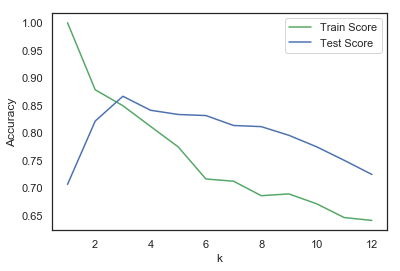

In [63]:
train_score_array = []
test_score_array = []

for k in range(1,13):
    knn = KNeighborsRegressor(k)
    knn.fit(X_reduced_train, y_train)
    train_score_array.append(knn.score(X_reduced_train, y_train))
    test_score_array.append(knn.score(X_reduced_test, y_test))

x_axis = range(1,13)
%matplotlib inline
plt.plot(x_axis, train_score_array, label = 'Train Score', c = 'g')
plt.plot(x_axis, test_score_array, label = 'Test Score', c='b')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()

In [64]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(KNeighborsRegressor(n_neighbors=2), X_reduced_train, y_train,cv=10,scoring='neg_mean_squared_error')
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))
print("rmse score: {:.2f}".format(sqrt(abs(scores.mean()))))

scores = cross_val_score(KNeighborsRegressor(n_neighbors=2), X_reduced_test, y_test,cv=10,scoring='neg_mean_squared_error')
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))
print("rmse score: {:.2f}".format(sqrt(abs(scores.mean()))))

Cross-validation scores: [  -6.09170298  -53.10575323 -136.90590776  -53.15201261  -40.57646638
 -421.8561589    -5.61605601  -66.63515753 -450.56178865  -25.46633947]
Average cross-validation score: -126.00
rmse score: 11.22
Cross-validation scores: [ -46.92297798   -2.27839543  -17.88590705  -67.11890333  -66.73414522
 -488.80454146  -63.81886872  -38.16539083   -6.092589    -53.28554859]
Average cross-validation score: -85.11
rmse score: 9.23


### Linear Regression with PCA

In [65]:
lreg = LinearRegression()
lreg.fit(X_reduced_train, y_train)
print(lreg.score(X_reduced_train, y_train))
print(lreg.score(X_reduced_test, y_test))

0.7394120031445741
0.6926772148576237


Text(0.5, 0, 'RM')

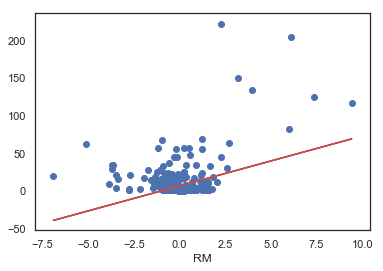

In [66]:
# plotting the best fitting line
%matplotlib inline
import matplotlib.pyplot as plt

X_train_rm = X_reduced_train[:,2].reshape(-1,1)
lreg.fit(X_train_rm, y_train)
y_predict = lreg.predict(X_train_rm)

plt.plot(X_train_rm, y_predict, c = 'r')
plt.scatter(X_train_rm,y_train)
plt.xlabel('RM')

In [67]:
# cross validation
from sklearn.model_selection import cross_val_score

scores = cross_val_score(LinearRegression(), X_reduced_train, y_train,cv=10,scoring='neg_mean_squared_error')
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))
print("rmse score: {:.2f}".format(sqrt(abs(scores.mean()))))

scores = cross_val_score(LinearRegression(), X_reduced_test, y_test,cv=10,scoring='neg_mean_squared_error')
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))
print("rmse score: {:.2f}".format(sqrt(abs(scores.mean()))))

Cross-validation scores: [ -25.74602581  -36.47556422  -44.44161933 -101.02431353 -128.97996396
 -251.71023099  -30.6252639  -163.49006868 -412.2210764   -29.97536345]
Average cross-validation score: -122.47
rmse score: 11.07
Cross-validation scores: [ -48.09885117   -2.01937191  -10.72518185 -219.62142612  -81.89109942
 -121.21213261  -48.81902087  -70.9896484    -8.64772459  -30.88131904]
Average cross-validation score: -64.29
rmse score: 8.02


### Lasso Regression with PCA

In [68]:
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
grid_search = GridSearchCV(Lasso(random_state=0), param_grid, cv=10, return_train_score=True)

grid_search.fit(X_reduced_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'alpha': 1}
Best cross-validation score: 0.50


Text(0.5, 0, '$\\alpha$')

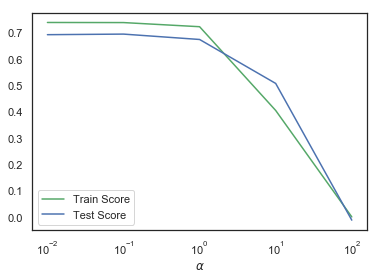

In [69]:
x_range = [0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    lasso = Lasso(alpha,random_state=0)
    lasso.fit(X_reduced_train,y_train)
    train_score_list.append(lasso.score(X_reduced_train,y_train))
    test_score_list.append(lasso.score(X_reduced_test, y_test))
    
%matplotlib inline

plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

In [70]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(Lasso(alpha=1), X_reduced_train, y_train,cv=10,scoring='neg_mean_squared_error')
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))
print("rmse score: {:.2f}".format(sqrt(abs(scores.mean()))))

scores = cross_val_score(Lasso(alpha=1), X_reduced_test, y_test,cv=10,scoring='neg_mean_squared_error')
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))
print("rmse score: {:.2f}".format(sqrt(abs(scores.mean()))))

Cross-validation scores: [ -22.44073387  -42.0965684   -38.14169246 -123.03213633  -92.1821748
 -305.85148103  -22.38207926 -117.61641594 -439.56971972  -25.7443291 ]
Average cross-validation score: -122.91
rmse score: 11.09
Cross-validation scores: [ -26.86800423   -1.93326649   -5.9443243   -54.78458434  -64.66053699
 -349.14237306  -60.0792345   -16.97830899   -6.74497835  -49.75423595]
Average cross-validation score: -63.69
rmse score: 7.98


### Ridge Regression with PCA

In [71]:
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10,100]}
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
grid_search = GridSearchCV(Ridge(random_state=0), param_grid, cv=10, return_train_score=True)

grid_search.fit(X_reduced_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'alpha': 100}
Best cross-validation score: 0.50


Text(0.5, 0, '$\\alpha$')

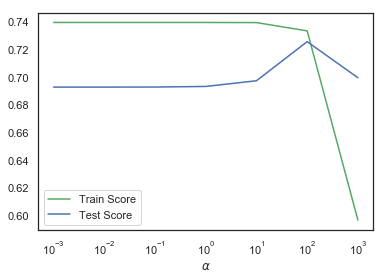

In [72]:
x_range = [0.001,0.01, 0.1, 1, 10,100,1000]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_reduced_train,y_train)
    train_score_list.append(ridge.score(X_reduced_train,y_train))
    test_score_list.append(ridge.score(X_reduced_test, y_test))
    
%matplotlib inline

plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

In [73]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(Ridge(alpha=100), X_reduced_train, y_train,cv=10,scoring='neg_mean_squared_error')
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))
print("rmse score: {:.2f}".format(sqrt(abs(scores.mean()))))

scores = cross_val_score(Ridge(alpha=100), X_reduced_test, y_test,cv=10,scoring='neg_mean_squared_error')
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))
print("rmse score: {:.2f}".format(sqrt(abs(scores.mean()))))

Cross-validation scores: [ -21.35609781  -35.63109159  -38.57553942 -114.50731276  -92.43917421
 -292.85234173  -22.95006221 -122.13362526 -440.09041116  -23.30712318]
Average cross-validation score: -120.38
rmse score: 10.97
Cross-validation scores: [ -30.66957717   -1.66336643   -5.32639144  -13.93330322  -65.96824944
 -352.49274772  -78.98834678  -19.29582811  -10.75637782  -50.53231769]
Average cross-validation score: -62.96
rmse score: 7.93


### Polynomial with PCA

In [74]:
from  sklearn.preprocessing  import PolynomialFeatures
from sklearn.linear_model import LinearRegression
train_score_list = []
test_score_list = []
lreg=LinearRegression()
for n in range(1,4):
    poly = PolynomialFeatures(n)
    X_train_poly_p = poly.fit_transform(X_reduced_train)
    X_test_poly_p = poly.transform(X_reduced_test)
    lreg.fit(X_train_poly_p, y_train)
    train_score_list.append(lreg.score(X_train_poly_p, y_train))
    test_score_list.append(lreg.score(X_test_poly_p, y_test))

In [75]:
print(train_score_list)
print(test_score_list)

[0.7394120031445741, 0.9915124931966133, 0.9999991149342913]
[0.6926772148576237, 0.6363522929012904, -4383461.5727731595]


##### Based on the above we can say this will be a polynomial of power 1 or linear

In [76]:
poly = PolynomialFeatures(1)
X_train_poly_p = poly.fit_transform(X_reduced_train)
X_test_poly_p = poly.transform(X_reduced_test)


scores = cross_val_score(LinearRegression(), X_train_poly_p, y_train,cv=10,scoring='neg_mean_squared_error')
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))
print("rmse score: {:.2f}".format(sqrt(abs(scores.mean()))))

scores = cross_val_score(LinearRegression(), X_test_poly_p, y_test,cv=10,scoring='neg_mean_squared_error')
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))
print("rmse score: {:.2f}".format(sqrt(abs(scores.mean()))))

Cross-validation scores: [ -25.74602581  -36.47556422  -44.44161933 -101.02431353 -128.97996396
 -251.71023099  -30.6252639  -163.49006868 -412.2210764   -29.97536345]
Average cross-validation score: -122.47
rmse score: 11.07
Cross-validation scores: [ -48.09885117   -2.01937191  -10.72518185 -219.62142612  -81.89109942
 -121.21213261  -48.81902087  -70.9896484    -8.64772459  -30.88131904]
Average cross-validation score: -64.29
rmse score: 8.02


### Linear SVR with PCA

In [77]:
from sklearn.svm import LinearSVR

param_grid = {'C': [0.001,0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(LinearSVR(), param_grid, cv=10, return_train_score=True)

grid_search.fit(X_reduced_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 1}
Best cross-validation score: 0.64


Text(0.5, 0, '$\\alpha$')

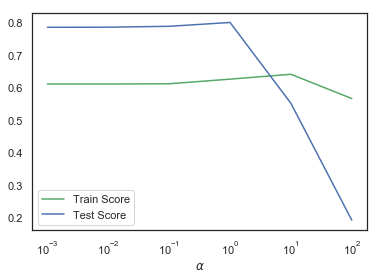

In [78]:
x_range = [0.001,0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []

for c in x_range: 
    linear_svm = LinearSVR(c)
    linear_svm.fit(X_reduced_train,y_train)
    train_score_list.append(linear_svm.score(X_reduced_train,y_train))
    test_score_list.append(linear_svm.score(X_reduced_test, y_test))
%matplotlib inline
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

In [79]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(LinearSVR(C=0.1), X_reduced_train, y_train,cv=10,scoring='neg_mean_squared_error')
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))
print("rmse score: {:.2f}".format(sqrt(abs(scores.mean()))))
scores = cross_val_score(LinearSVR(C=0.1), X_reduced_test, y_test,cv=10,scoring='neg_mean_squared_error')
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))
print("rmse score: {:.2f}".format(sqrt(abs(scores.mean()))))

Cross-validation scores: [ -14.90558482  -58.08654095 -142.3664698  -233.32557301 -230.43206202
 -583.03533202   -6.21728038  -17.20377071 -626.84137409  -13.67161577]
Average cross-validation score: -192.61
rmse score: 13.88
Cross-validation scores: [-4.15545553e+01 -1.84805357e-01 -6.74349979e-01 -4.24161443e+01
 -9.39005543e+01 -5.14943718e+02 -1.24768089e+02 -9.69192138e+00
 -3.12025414e+01 -1.00346542e+02]
Average cross-validation score: -95.97
rmse score: 9.80


### SVM Kernels with PCA

### RBF

In [80]:

from sklearn.svm import SVR
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100,1000],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
             }
print("Parameter grid:\n{}".format(param_grid))

grid_search = GridSearchCV(SVR(kernel='rbf'), param_grid, cv=10, return_train_score=True)
grid_search.fit(X_reduced_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
Best parameters: {'C': 1000, 'gamma': 0.01}
Best cross-validation score: 0.86


In [81]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(SVR(kernel='rbf',gamma=.01,C=1000), X_reduced_train, y_train,cv=10,scoring='neg_mean_squared_error')
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))
print("rmse score: {:.2f}".format(sqrt(abs(scores.mean()))))

scores = cross_val_score(SVR(kernel='rbf',gamma=0.01,C=1000), X_reduced_test, y_test,cv=10,scoring='neg_mean_squared_error')
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))
print("rmse score: {:.2f}".format(sqrt(abs(scores.mean()))))

Cross-validation scores: [  -1.17823564   -9.67774189 -107.46147895  -27.66734774  -30.32089404
  -93.80637151   -5.59168045  -22.52829458 -194.42938502   -6.0116484 ]
Average cross-validation score: -49.87
rmse score: 7.06
Cross-validation scores: [-21.07066323  -0.94063477  -2.49116088 -17.0328924  -74.48695411
 -71.96730003  -7.97503322  -6.94494802  -6.15927644 -31.0670376 ]
Average cross-validation score: -24.01
rmse score: 4.90


### Poly

In [82]:

from sklearn.svm import SVR
param_grid = {'C': [ 10, 100,1000],
              'gamma': [0.0001, 0.001, .01],
              'degree': [1,2,3]
             }
print("Parameter grid:\n{}".format(param_grid))

grid_search = GridSearchCV(SVR(kernel='poly'), param_grid, cv=10, return_train_score=True)
grid_search.fit(X_reduced_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Parameter grid:
{'C': [10, 100, 1000], 'gamma': [0.0001, 0.001, 0.01], 'degree': [1, 2, 3]}
Best parameters: {'C': 100, 'degree': 1, 'gamma': 0.01}
Best cross-validation score: 0.65


In [83]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(SVR(kernel='poly',gamma=.01,C=100,degree=1), X_reduced_train, y_train,cv=10,scoring='neg_mean_squared_error')
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))
print("rmse score: {:.2f}".format(sqrt(abs(scores.mean()))))

scores = cross_val_score(SVR(kernel='poly',gamma=0.01,C=100,degree=1), X_reduced_test, y_test,cv=10,scoring='neg_mean_squared_error')
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))
print("rmse score: {:.2f}".format(sqrt(abs(scores.mean()))))

Cross-validation scores: [ -12.80053779  -51.11802436  -77.85637273 -200.04845719 -142.04828626
 -414.98941965   -6.64068978  -39.27056177 -570.89536563  -11.60684569]
Average cross-validation score: -152.73
rmse score: 12.36
Cross-validation scores: [ -35.66968581   -0.63850889   -2.96113326  -89.83161277  -60.31371573
 -317.55323534  -71.29389835  -62.60236932  -13.6510489   -70.98572463]
Average cross-validation score: -72.55
rmse score: 8.52


### Linear SVM

In [84]:
from sklearn.svm import SVR
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100,1000],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
             }
print("Parameter grid:\n{}".format(param_grid))

grid_search = GridSearchCV(SVR(kernel='linear'), param_grid, cv=10, return_train_score=True)
grid_search.fit(X_reduced_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
Best parameters: {'C': 1, 'gamma': 0.001}
Best cross-validation score: 0.65


In [85]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(SVR(kernel='linear',gamma=.001,C=1), X_reduced_train, y_train,cv=10,scoring='neg_mean_squared_error')
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))
print("rmse score: {:.2f}".format(sqrt(abs(scores.mean()))))

scores = cross_val_score(SVR(kernel='linear',gamma=0.001,C=1), X_reduced_test, y_test,cv=10,scoring='neg_mean_squared_error')
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))
print("rmse score: {:.2f}".format(sqrt(abs(scores.mean()))))

Cross-validation scores: [ -12.8004095   -51.11759736  -77.8627219  -200.05009965 -142.04703813
 -414.98709297   -6.63962775  -39.28753785 -570.89679272  -11.60639313]
Average cross-validation score: -152.73
rmse score: 12.36
Cross-validation scores: [ -35.66742283   -0.63854995   -2.96079202  -89.84867765  -60.31391726
 -317.6234494   -71.29108341  -62.60833786  -13.65082928  -70.98327897]
Average cross-validation score: -72.56
rmse score: 8.52


### Results comparision of PCA models and without PCA models

In [86]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
def score_print_reg(y,y_pred,count):
    b=[]
    b.append(sqrt(mean_squared_error(y,y_pred[count])))
    b.append(r2_score(y,y_pred[count]))
    b.append(mean_absolute_error(y,y_pred[count]))
    return b

In [87]:
knn_pca=KNeighborsRegressor(n_neighbors=2)
knn_pca.fit(X_reduced_train,y_train)
linear_pca=LinearRegression()
linear_pca.fit(X_reduced_train,y_train)
svm_lin_pca=SVR(kernel='linear',gamma=0.001,C=1)
svm_lin_pca.fit(X_reduced_train,y_train)

svm_poly_pca=SVR(kernel='poly',gamma=0.01,C=100,degree=1)
svm_poly_pca.fit(X_reduced_train,y_train)

svm_rbf_pca=SVR(kernel='rbf',gamma=0.01,C=1000)
svm_rbf_pca.fit(X_reduced_train,y_train)
linear_svr_pca=LinearSVR(C=0.1)
linear_svr_pca.fit(X_reduced_train,y_train)

lasso_pca=Lasso(alpha=1)
lasso_pca.fit(X_reduced_train,y_train)
ridge_pca=Ridge(alpha=100)
ridge_pca.fit(X_reduced_train,y_train)
poly_pca=LinearRegression()
poly_pca.fit(X_train_poly_p,y_train)

models_pca=[knn_pca,linear_pca,linear_svr_pca,svm_lin_pca,svm_poly_pca,svm_rbf_pca,lasso_pca,ridge_pca,poly_pca]
y_pred=[]
count=0
scores=[]
for i in models_pca:
    print(count)
    if (i!=poly_pca):
        y_pred.append(i.predict(pca.transform(X_test)))
        scores.append(score_print_reg(y_test,y_pred,count))
    else:
        y_pred.append(i.predict(X_test_poly_p))
        scores.append(score_print_reg(y_test,y_pred,count))
    count=count+1

0
1
2
3
4
5
6
7
8


In [88]:
pca_models=pd.DataFrame()
pca_models['models']=['knn_pca','linear_pca','linear_svr_pca','svm_lin_pca','svm_poly_pca','svm_rbf_pca','lasso_pca','ridge_pca','poly_pca']
pca_models=pd.concat([pca_models,pd.DataFrame(scores)], axis=1)
pca_models.columns=['models','root_mean_squared_error','r2_score','mean_absolute_error']
pca_models

,models,root_mean_squared_error,r2_score,mean_absolute_error
0,knn_pca,5.348371,0.821201,1.721361
1,linear_pca,7.011904,0.692677,4.270471
2,linear_svr_pca,6.634138,0.724899,2.090485
3,svm_lin_pca,5.816805,0.788509,2.099811
4,svm_poly_pca,5.816836,0.788507,2.099825
5,svm_rbf_pca,4.976481,0.845201,1.369740
6,lasso_pca,7.213538,0.674748,3.905296
7,ridge_pca,6.626396,0.725541,3.812004
8,poly_pca,7.011904,0.692677,4.270471


In [89]:
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y,random_state=5,test_size = 0.25)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

knn=KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train,y_train)
linear=LinearRegression()
linear.fit(X_train,y_train)

X_train_org, X_test_org, y_train, y_test = train_test_split(X, y,random_state=5,test_size = 0.25)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

svm_lin=SVR(kernel='linear',gamma=0.001,C=.1)
svm_lin.fit(X_train,y_train)

svm_poly=SVR(kernel='poly',gamma=0.001,C=100,degree=1)
svm_poly.fit(X_train,y_train)

svm_rbf=SVR(kernel='rbf',gamma=0.01,C=1000)
svm_rbf.fit(X_train,y_train)
linear_svr=LinearSVR(C=0.1)
linear_svr.fit(X_train,y_train)

lasso=Lasso(alpha=1)
lasso.fit(X_train,y_train)
ridge=Ridge(alpha=1)
ridge.fit(X_train,y_train)

X_train_org, X_test_org, y_train, y_test = train_test_split(X, y,random_state=5,test_size = 0.25)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)
lreg=LinearRegression()

poly = PolynomialFeatures(2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
poly=LinearRegression()
poly.fit(X_train_poly,y_train)

models=[knn,linear,linear_svr,svm_lin,svm_poly,svm_rbf,lasso,ridge,poly]
y_pred=[]
count=0
scores=[]
for i in models:
    print(count)
    if (i!=poly):
        y_pred.append(i.predict(X_test))
        scores.append(score_print_reg(y_test,y_pred,count))
    else:
        y_pred.append(i.predict(X_test_poly))
        scores.append(score_print_reg(y_test,y_pred,count))
    count=count+1

0
1
2
3
4
5
6
7
8


In [90]:
simple_models=pd.DataFrame()
simple_models['models']=['knn','linear','linear_svr','svm_lin','svm_poly','svm_rbf','lasso','ridge','poly']
simple_models=pd.concat([simple_models,pd.DataFrame(scores)], axis=1)
simple_models.columns=['models','root_mean_squared_error','r2_score','mean_absolute_error']
simple_models

,models,root_mean_squared_error,r2_score,mean_absolute_error
0,knn,7.431690,0.686621,2.098741
1,linear,7.702315,0.663382,3.505027
2,linear_svr,12.595186,0.099873,5.773234
3,svm_lin,12.603347,0.098707,5.918330
4,svm_poly,12.603409,0.098698,5.918514
5,svm_rbf,12.646864,0.092472,5.200907
6,lasso,12.371767,0.131524,7.045729
7,ridge,12.417681,0.125066,7.538831
8,poly,1.643384,0.984676,0.430888


In [91]:
concat_simple_pca=pd.concat([pca_models.transpose(),simple_models.transpose()],axis=1)
concat_simple_pca.columns=['knn_pca','linear_pca','linear_svr_pca','svm_lin_pca','svm_poly_pca','svm_rbf_pca','lasso_pca','ridge_pca','poly_pca','knn','linear','linear_svr','svm_lin','svm_poly','svm_rbf','lasso','ridge','poly']

concat_simple_pca.drop(['models'],inplace=True)


In [92]:
concat_reg=concat_simple_pca.sort_index(axis=1)
concat_reg

,knn,knn_pca,lasso,lasso_pca,linear,linear_pca,linear_svr,linear_svr_pca,poly,poly_pca,ridge,ridge_pca,svm_lin,svm_lin_pca,svm_poly,svm_poly_pca,svm_rbf,svm_rbf_pca
root_mean_squared_error,7.43169,5.34837,12.3718,7.21354,7.70232,7.0119,12.5952,6.63414,1.64338,7.0119,12.4177,6.6264,12.6033,5.8168,12.6034,5.81684,12.6469,4.97648
r2_score,0.686621,0.821201,0.131524,0.674748,0.663382,0.692677,0.0998734,0.724899,0.984676,0.692677,0.125066,0.725541,0.0987066,0.788509,0.0986978,0.788507,0.0924719,0.845201
mean_absolute_error,2.09874,1.72136,7.04573,3.9053,3.50503,4.27047,5.77323,2.09048,0.430888,4.27047,7.53883,3.812,5.91833,2.09981,5.91851,2.09983,5.20091,1.36974


##### We can see from the above table that all the models with PCA are having High Score and less Error which are the signs of good model

### Neural Networks for  Regression

In [93]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from keras.optimizers import SGD
from keras.utils import np_utils

Using TensorFlow backend.


In [94]:
X = df[['District', 'Sector_score', 'PARA_A', 'Score_A', 'PARA_B', 'Score_B',
       'numbers', 'Money_Value', 'History', 
       'MONEY_Marks', 'Loss', 'History_score']]
y = df[['Audit_Risk']]

In [95]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
X_train_org,X_test_org,y_train,y_test=train_test_split(X,y,random_state=0)

scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train_org)
X_test=scaler.transform(X_test_org)


In [96]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

def build_model():
    model = keras.Sequential([
    layers.Dense(64, activation=tf.nn.relu, input_dim=12),
    layers.Dense(64, activation=tf.nn.relu),
    layers.Dense(1)
  ])

    optimizer = tf.keras.optimizers.RMSprop(0.001)

    model.compile(loss='mean_squared_error',
                optimizer=optimizer,
                metrics=['mean_absolute_error', 'mean_squared_error'])
    return model


In [97]:
model10 = build_model()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [98]:
model10.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                832       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 5,057
Trainable params: 5,057
Non-trainable params: 0
_________________________________________________________________


In [99]:
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end='')

EPOCHS = 1000
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=25)

history = model10.fit(
  X_train, y_train,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[early_stop,PrintDot()])


Instructions for updating:
Use tf.cast instead.

....................................................................................................
....................................................................................................
....................................................................................................
.....................................

In [100]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail(25)

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error,epoch
312,2.116046,0.650984,2.116046,57.501756,1.407531,57.501759,312
313,2.048388,0.598600,2.048388,53.658435,1.691836,53.658436,313
314,2.222071,0.691967,2.222071,60.038373,1.510033,60.038372,314
315,1.861136,0.577650,1.861136,61.871681,1.655275,61.871681,315
316,2.180874,0.630138,2.180874,57.219294,1.387847,57.219292,316
317,1.770474,0.568520,1.770474,54.247405,1.377104,54.247402,317
318,2.211983,0.694309,2.211983,56.949198,1.476616,56.949203,318
319,1.494803,0.544665,1.494803,52.646359,1.400280,52.646362,319
320,2.120191,0.646842,2.120191,56.349198,1.462089,56.349201,320
321,2.084494,0.600097,2.084494,58.030790,1.619537,58.030792,321


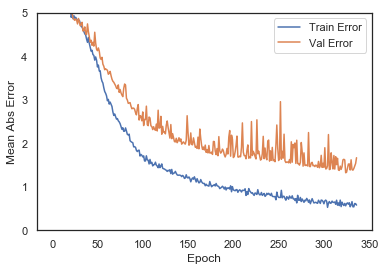

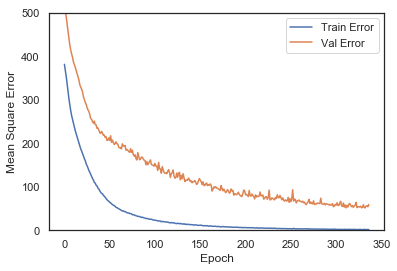

In [101]:
import matplotlib.pyplot as plt
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
  
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error')
    plt.plot(hist['epoch'], hist['mean_absolute_error'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
           label = 'Val Error')
    plt.ylim([0,5])
    plt.legend()
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error')
    plt.plot(hist['epoch'], hist['mean_squared_error'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_mean_squared_error'],
           label = 'Val Error')
    plt.ylim([0,500])
    plt.legend()
    plt.show()


plot_history(history)

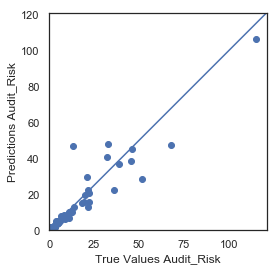

In [102]:
test_predictions = model10.predict(X_test).flatten()

plt.scatter(y_test, test_predictions)
plt.xlabel('True Values Audit_Risk')
plt.ylabel('Predictions Audit_Risk')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([0, 150], [0, 150])


In [103]:
print("R2=",r2_score(y_test,test_predictions))

R2= 0.9010580840876514


In [104]:
print("RMSE",sqrt(mean_squared_error(y_test,test_predictions)))

RMSE 3.978585751111543


### Classification

In [2]:
X = df[['District', 'Sector_score', 'PARA_A', 'Score_A', 'PARA_B', 'Score_B',
       'numbers', 'Money_Value', 'History', 
       'MONEY_Marks', 'Loss', 'History_score']]
y = df[['Risk_x']]
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

X_train_org, X_test_org, y_train, y_test = train_test_split(X, y,stratify=y,random_state=3,test_size = 0.25)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

dtree = DecisionTreeClassifier(max_depth=8, random_state=0)
scores = cross_val_score(dtree, X_train, y_train,cv=10,scoring='recall')
print("Recall Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

scores = cross_val_score(dtree, X_test, y_test,cv=10,scoring='recall')
print(" Recall Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))



dtree = DecisionTreeClassifier(max_depth=8, random_state=0)
scores = cross_val_score(dtree, X_train, y_train,cv=10)
print("Accuracy Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

scores = cross_val_score(dtree, X_test, y_test,cv=10)
print(" Accuracy Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

NameError: name 'df' is not defined

#### KNN classifier

In [106]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

X_train_org, X_test_org, y_train, y_test = train_test_split(X, y,stratify=y,random_state=3,test_size = 0.25)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)


knn = KNeighborsClassifier(3)
scores = cross_val_score(knn, X_train, y_train,cv=10,scoring='recall')
print("Recall Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

scores = cross_val_score(knn, X_test, y_test,cv=10,scoring='recall')
print(" Recall Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))




knn = KNeighborsClassifier(3)
scores = cross_val_score(knn, X_train, y_train,cv=10)
print("Accuracy Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

scores = cross_val_score(knn, X_test, y_test,cv=10)
print(" Accuracy Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Recall Cross-validation scores: [1.         0.91304348 0.95652174 0.95652174 0.82608696 0.95652174
 1.         0.86363636 0.95454545 1.        ]
Average cross-validation score: 0.94
 Recall Cross-validation scores: [0.875      0.875      0.625      0.75       0.625      1.
 0.85714286 0.85714286 0.85714286 1.        ]
Average cross-validation score: 0.83
Accuracy Cross-validation scores: [1.         0.93103448 0.98275862 0.98275862 0.92982456 0.98245614
 1.         0.94642857 0.98214286 1.        ]
Average cross-validation score: 0.97
 Accuracy Cross-validation scores: [0.9        0.95       0.85       0.9        0.85       1.
 0.94444444 0.94444444 0.77777778 1.        ]
Average cross-validation score: 0.91


#### Logistic Regression

In [107]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
logit=LogisticRegression(C=100,penalty='l1')
scores = cross_val_score(logit, X_train, y_train,cv=10,scoring='recall')
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

scores = cross_val_score(logit, X_test, y_test,cv=10,scoring='recall')
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

scores = cross_val_score(logit, X_train, y_train,cv=10)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

scores = cross_val_score(logit, X_test, y_test,cv=10)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [1.         1.         1.         1.         0.86956522 1.
 1.         0.90909091 0.95454545 1.        ]
Average cross-validation score: 0.97
Cross-validation scores: [1.    1.    0.75  1.    0.875 1.    1.    1.    1.    1.   ]
Average cross-validation score: 0.96
Cross-validation scores: [1.         0.98275862 1.         1.         0.94736842 1.
 1.         0.96428571 0.98214286 1.        ]
Average cross-validation score: 0.99
Cross-validation scores: [1.         1.         0.9        1.         0.95       1.
 1.         1.         0.83333333 1.        ]
Average cross-validation score: 0.97


#### Linear SVC 

In [108]:
from sklearn.svm import LinearSVC
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y,stratify=y,random_state=0,test_size = 0.25)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)
linear_svm = LinearSVC(C=10)

scores = cross_val_score(linear_svm, X_train, y_train,cv=10,scoring='recall')
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

scores = cross_val_score(linear_svm, X_test, y_test,cv=10,scoring='recall')
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

scores = cross_val_score(linear_svm, X_train, y_train,cv=10)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

scores = cross_val_score(linear_svm, X_test, y_test,cv=10)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [1.         1.         0.95652174 0.95652174 1.         1.
 0.91304348 0.95454545 1.         0.95454545]
Average cross-validation score: 0.97
Cross-validation scores: [0.875 1.    1.    0.875 1.    1.    1.    1.    1.    1.   ]
Average cross-validation score: 0.97
Cross-validation scores: [1.         1.         0.98275862 0.98275862 1.         1.
 0.96491228 0.98214286 1.         0.98214286]
Average cross-validation score: 0.99
Cross-validation scores: [0.95       1.         1.         0.9        1.         0.94736842
 1.         1.         0.94444444 1.        ]
Average cross-validation score: 0.97


#### SVM with kernels

### RBF

In [109]:
#rbf

param_grid = {'C': [0.001, 0.01, .1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
             }
print("Parameter grid:\n{}".format(param_grid))
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
grid_search = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=5, return_train_score=True)

X_train_org, X_test_org, y_train, y_test = train_test_split(X, y,stratify=y,random_state=0,test_size = 0.25)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)


grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Parameter grid:
{'C': [0.001, 0.01, 0.1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
Best parameters: {'C': 100, 'gamma': 0.1}
Best cross-validation score: 0.99


In [110]:
from sklearn.svm import SVC
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y,stratify=y,random_state=0,test_size = 0.25)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)


rbf=SVC(kernel='rbf',gamma=.1,C=100,probability=True)
scores = cross_val_score(rbf, X_train, y_train,cv=10,scoring='recall')
print("Recall Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

scores = cross_val_score(rbf, X_test, y_test,cv=10,scoring='recall')
print(" Recall Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

scores = cross_val_score(rbf, X_train, y_train,cv=10)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

scores = cross_val_score(rbf, X_test, y_test,cv=10)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Recall Cross-validation scores: [1.         0.95652174 0.95652174 0.91304348 1.         0.95652174
 1.         1.         1.         1.        ]
Average cross-validation score: 0.98
 Recall Cross-validation scores: [0.875      1.         1.         0.875      1.         0.875
 1.         0.85714286 0.85714286 1.        ]
Average cross-validation score: 0.93
Cross-validation scores: [1.         0.98275862 0.98275862 0.96551724 1.         0.96491228
 1.         1.         1.         0.96428571]
Average cross-validation score: 0.99
Cross-validation scores: [0.95       1.         1.         0.9        1.         0.89473684
 1.         0.94444444 0.94444444 1.        ]
Average cross-validation score: 0.96


### Poly

In [111]:
from sklearn.svm import SVC
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y,stratify=y,random_state=0,test_size = 0.25)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

poly=SVC(kernel='poly',gamma=10,C=100,degree=1,probability=True)
scores = cross_val_score(poly, X_train, y_train,cv=10,scoring='recall')
print("Recall Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

scores = cross_val_score(poly, X_test, y_test,cv=10,scoring='recall')
print(" Recall Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

scores = cross_val_score(poly, X_train, y_train,cv=10)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

scores = cross_val_score(poly, X_test, y_test,cv=10)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Recall Cross-validation scores: [1.         1.         0.95652174 0.95652174 1.         1.
 0.95652174 0.95454545 1.         1.        ]
Average cross-validation score: 0.98
 Recall Cross-validation scores: [0.875      1.         1.         1.         1.         1.
 1.         0.85714286 0.71428571 1.        ]
Average cross-validation score: 0.94
Cross-validation scores: [0.98275862 1.         0.98275862 0.98275862 1.         0.98245614
 0.98245614 0.98214286 1.         0.98214286]
Average cross-validation score: 0.99
Cross-validation scores: [0.95       1.         1.         0.95       1.         1.
 1.         0.94444444 0.77777778 1.        ]
Average cross-validation score: 0.96


### Linear

In [112]:
from sklearn.svm import SVC
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y,stratify=y,random_state=0,test_size = 0.25)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

linear=SVC(kernel='linear',C=10,gamma=.001,probability=True)
scores = cross_val_score(linear, X_train, y_train,cv=10,scoring='recall')
print("Recall Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

scores = cross_val_score(linear, X_test, y_test,cv=10,scoring='recall')
print(" Recall Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

scores = cross_val_score(linear, X_train, y_train,cv=10)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

scores = cross_val_score(linear, X_test, y_test,cv=10)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Recall Cross-validation scores: [1.         1.         0.95652174 0.95652174 1.         1.
 0.95652174 0.95454545 1.         1.        ]
Average cross-validation score: 0.98
 Recall Cross-validation scores: [0.875      1.         1.         0.875      1.         1.
 1.         1.         0.85714286 1.        ]
Average cross-validation score: 0.96
Cross-validation scores: [1.         1.         0.98275862 0.98275862 1.         1.
 0.98245614 0.98214286 1.         0.96428571]
Average cross-validation score: 0.99
Cross-validation scores: [0.95       1.         1.         0.9        1.         0.94736842
 1.         1.         0.88888889 1.        ]
Average cross-validation score: 0.97


#### Voting Classifier

#### Hard Voting Classifier

In [113]:
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators=[('lr', logit), ('knn', knn), ('dtree', dtree),('svc_k_linear', linear),('svc_k_poly', poly),('svc_k_rbf',rbf)], voting='hard')
voting_clf.fit(X_train, y_train)


VotingClassifier(estimators=[('lr', LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)), ('knn', KNeighb...',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False))],
         flatten_transform=None, n_jobs=None, voting='hard', weights=None)

In [114]:
voting_clf.score(X_train,y_train)

0.9964973730297724

In [115]:
scores = cross_val_score(voting_clf, X_train, y_train,cv=10,scoring='recall')
print("Recall Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

scores = cross_val_score(voting_clf, X_test, y_test,cv=10,scoring='recall')
print(" Recall Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

scores = cross_val_score(voting_clf, X_train, y_train,cv=10)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

scores = cross_val_score(voting_clf, X_test, y_test,cv=10)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Recall Cross-validation scores: [1.         1.         0.95652174 0.95652174 1.         1.
 0.91304348 0.95454545 1.         1.        ]
Average cross-validation score: 0.98
 Recall Cross-validation scores: [0.875      1.         1.         0.875      1.         1.
 1.         0.85714286 0.71428571 1.        ]
Average cross-validation score: 0.93
Cross-validation scores: [1.         1.         0.98275862 0.98275862 1.         1.
 0.96491228 0.98214286 1.         0.98214286]
Average cross-validation score: 0.99
Cross-validation scores: [0.95       1.         1.         0.9        1.         0.94736842
 1.         0.94444444 0.88888889 1.        ]
Average cross-validation score: 0.96


#### Soft Voting

In [116]:
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators=[('lr', logit), ('knn', knn), ('dtree', dtree),('svc_k_linear', linear),('svc_k_poly', poly),('svc_k_rbf',rbf)], voting='soft')
voting_clf.fit(X_train, y_train)


VotingClassifier(estimators=[('lr', LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)), ('knn', KNeighb...',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False))],
         flatten_transform=None, n_jobs=None, voting='soft', weights=None)

In [117]:
scores = cross_val_score(voting_clf, X_train, y_train,cv=10,scoring='recall')
print("Recall Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

scores = cross_val_score(voting_clf, X_test, y_test,cv=10,scoring='recall')
print(" Recall Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

scores = cross_val_score(voting_clf, X_train, y_train,cv=10)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

scores = cross_val_score(voting_clf, X_test, y_test,cv=10)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Recall Cross-validation scores: [1.         1.         0.95652174 0.95652174 1.         1.
 0.91304348 0.95454545 1.         1.        ]
Average cross-validation score: 0.98
 Recall Cross-validation scores: [0.875      1.         1.         0.875      1.         1.
 1.         0.85714286 0.85714286 1.        ]
Average cross-validation score: 0.95
Cross-validation scores: [1.         1.         0.98275862 0.98275862 1.         1.
 0.96491228 0.98214286 1.         0.98214286]
Average cross-validation score: 0.99
Cross-validation scores: [0.95       1.         1.         0.9        1.         0.94736842
 1.         0.94444444 0.94444444 1.        ]
Average cross-validation score: 0.97


#### Bagging Classifier

In [118]:
from sklearn.ensemble import BaggingClassifier

##### Bagging Classifier for Decision Tree

In [119]:

X_train_org, X_test_org, y_train, y_test = train_test_split(X, y,stratify=y,random_state=3,test_size = 0.25)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

grid = {"max_samples": [50, 100,150],
                          "n_estimators": [100,200,400,500]
        }

grid_search = GridSearchCV(BaggingClassifier(dtree,bootstrap=True, random_state=0), grid, cv=10, return_train_score=True,scoring='recall')

grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'max_samples': 150, 'n_estimators': 100}
Best cross-validation score: 0.97


In [120]:
bag_clf = BaggingClassifier(dtree, n_estimators=100, max_samples=150, bootstrap=True, random_state=0)

In [121]:
scores = cross_val_score(bag_clf, X_train, y_train,cv=10,scoring='recall')
print("Recall Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

scores = cross_val_score(bag_clf, X_test, y_test,cv=10,scoring='recall')
print(" Recall Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

scores = cross_val_score(bag_clf, X_train, y_train,cv=10)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

scores = cross_val_score(bag_clf, X_test, y_test,cv=10)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Recall Cross-validation scores: [1.         0.95652174 1.         1.         0.86956522 0.95652174
 1.         0.95454545 0.95454545 1.        ]
Average cross-validation score: 0.97
 Recall Cross-validation scores: [1.   1.   0.75 1.   1.   1.   1.   1.   1.   1.  ]
Average cross-validation score: 0.97
Cross-validation scores: [1.         0.94827586 0.98275862 0.96551724 0.94736842 0.98245614
 0.98245614 0.98214286 0.96428571 0.98214286]
Average cross-validation score: 0.97
Cross-validation scores: [1.         1.         0.9        1.         1.         1.
 1.         1.         0.94444444 1.        ]
Average cross-validation score: 0.98


##### Bagging for Logistic Regression

In [122]:

X_train_org, X_test_org, y_train, y_test = train_test_split(X, y,stratify=y,random_state=3,test_size = 0.25)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

grid = {"max_samples": [50, 100,150, 200],
                          "n_estimators": [100,200,400,500]
        }

grid_search = GridSearchCV(BaggingClassifier(logit,bootstrap=True, random_state=0), grid, cv=10, return_train_score=True,scoring='recall')

grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'max_samples': 200, 'n_estimators': 100}
Best cross-validation score: 0.96


In [123]:
bag_clf_2 = BaggingClassifier(logit, n_estimators=200, max_samples=100, bootstrap=True, random_state=0)

In [124]:
scores = cross_val_score(bag_clf_2, X_train, y_train,cv=10,scoring='recall')
print("Recall Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

scores = cross_val_score(bag_clf_2, X_test, y_test,cv=10,scoring='recall')
print(" Recall Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

scores = cross_val_score(bag_clf_2, X_train, y_train,cv=10)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

scores = cross_val_score(bag_clf_2, X_test, y_test,cv=10)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Recall Cross-validation scores: [0.95652174 0.95652174 1.         1.         0.91304348 0.91304348
 0.95652174 0.86363636 1.         1.        ]
Average cross-validation score: 0.96
 Recall Cross-validation scores: [1.         1.         0.875      0.875      0.875      1.
 1.         1.         0.85714286 1.        ]
Average cross-validation score: 0.95
Cross-validation scores: [0.98275862 0.9137931  1.         1.         0.96491228 0.96491228
 0.98245614 0.94642857 1.         1.        ]
Average cross-validation score: 0.98
Cross-validation scores: [1.         1.         0.95       0.95       0.95       1.
 1.         1.         0.77777778 1.        ]
Average cross-validation score: 0.96


##### Pasting with SVM linear

In [125]:

X_train_org, X_test_org, y_train, y_test = train_test_split(X, y,stratify=y,random_state=3,test_size = 0.25)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

grid = {"max_samples": [50, 100,150, 200],
                          "n_estimators": [100,200,400,500]
        }

grid_search = GridSearchCV(BaggingClassifier(linear,bootstrap=False, random_state=0), grid, cv=10, return_train_score=True,scoring='recall')

grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'max_samples': 150, 'n_estimators': 100}
Best cross-validation score: 0.96


In [126]:
bag_clf_3 = BaggingClassifier(linear, n_estimators=100, max_samples=150, bootstrap=True, random_state=0)

In [127]:
scores = cross_val_score(bag_clf_3, X_train, y_train,cv=10,scoring='recall')
print("Recall Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

scores = cross_val_score(bag_clf_3, X_test, y_test,cv=10,scoring='recall')
print(" Recall Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

scores = cross_val_score(bag_clf_3, X_train, y_train,cv=10)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

scores = cross_val_score(bag_clf_3, X_test, y_test,cv=10)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Recall Cross-validation scores: [1.         0.95652174 1.         1.         0.91304348 0.91304348
 0.95652174 0.86363636 1.         1.        ]
Average cross-validation score: 0.96
 Recall Cross-validation scores: [0.875      1.         0.75       0.875      0.75       1.
 1.         1.         0.85714286 1.        ]
Average cross-validation score: 0.91
Cross-validation scores: [1.         0.94827586 1.         1.         0.96491228 0.96491228
 0.98245614 0.94642857 1.         0.98214286]
Average cross-validation score: 0.98
Cross-validation scores: [0.95       1.         0.9        0.95       0.9        1.
 1.         1.         0.83333333 1.        ]
Average cross-validation score: 0.95


##### Pasting with poly svm kernel

In [128]:

X_train_org, X_test_org, y_train, y_test = train_test_split(X, y,stratify=y,random_state=3,test_size = 0.25)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

grid = {"max_samples": [50,100,150],
                          "n_estimators": [100,200,300]
        }

grid_search = GridSearchCV(BaggingClassifier(poly,bootstrap=False, random_state=0), grid, cv=10, return_train_score=True,scoring='recall')

grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'max_samples': 150, 'n_estimators': 100}
Best cross-validation score: 0.96


In [129]:
bag_clf_4 = BaggingClassifier(linear, n_estimators=100, max_samples=150, bootstrap=True, random_state=0)

In [130]:
scores = cross_val_score(bag_clf_4, X_train, y_train,cv=10,scoring='recall')
print("Recall Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

scores = cross_val_score(bag_clf_4, X_test, y_test,cv=10,scoring='recall')
print(" Recall Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

scores = cross_val_score(bag_clf_4, X_train, y_train,cv=10)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

scores = cross_val_score(bag_clf_4, X_test, y_test,cv=10)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Recall Cross-validation scores: [1.         0.95652174 1.         1.         0.91304348 0.91304348
 0.95652174 0.86363636 1.         1.        ]
Average cross-validation score: 0.96
 Recall Cross-validation scores: [0.875      1.         0.75       0.875      0.75       1.
 1.         1.         0.85714286 1.        ]
Average cross-validation score: 0.91
Cross-validation scores: [1.         0.94827586 1.         1.         0.96491228 0.96491228
 0.98245614 0.94642857 1.         0.98214286]
Average cross-validation score: 0.98
Cross-validation scores: [0.95       1.         0.9        0.95       0.9        1.
 1.         1.         0.83333333 1.        ]
Average cross-validation score: 0.95


### AdaBoosing classifier 

##### AdaBoosting Decision Tree

In [131]:
from sklearn.ensemble import AdaBoostClassifier

In [132]:
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y,stratify=y,random_state=3,test_size = 0.25)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

grid = {"learning_rate": [0.001,0.01,0.05, 0.1, 0.3],
                          "n_estimators": [100,200,250,300],
                          }

grid_search = GridSearchCV(AdaBoostClassifier(dtree, random_state=0),grid, cv=10, return_train_score=True,scoring='recall')

grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))



Best parameters: {'learning_rate': 0.001, 'n_estimators': 100}
Best cross-validation score: 0.97


In [133]:
ada_clf = AdaBoostClassifier(dtree, n_estimators=100, learning_rate=.001, random_state=0)

In [134]:
scores = cross_val_score(ada_clf, X_train, y_train,cv=10,scoring='recall')
print("Recall Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

scores = cross_val_score(ada_clf, X_test, y_test,cv=10,scoring='recall')
print(" Recall Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

scores = cross_val_score(ada_clf, X_train, y_train,cv=10)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

scores = cross_val_score(ada_clf, X_test, y_test,cv=10)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Recall Cross-validation scores: [1.         1.         0.95652174 1.         0.91304348 0.95652174
 1.         0.95454545 0.95454545 1.        ]
Average cross-validation score: 0.97
 Recall Cross-validation scores: [1.   1.   0.75 1.   1.   1.   1.   1.   1.   1.  ]
Average cross-validation score: 0.97
Cross-validation scores: [1.         0.94827586 0.98275862 0.96551724 0.96491228 0.96491228
 0.96491228 0.94642857 0.98214286 0.98214286]
Average cross-validation score: 0.97
Cross-validation scores: [1.         1.         0.9        1.         1.         1.
 1.         0.88888889 0.83333333 1.        ]
Average cross-validation score: 0.96


##### AdaBoost Logistic Regression

In [135]:
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y,stratify=y,random_state=3,test_size = 0.25)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)


In [136]:


grid = {"learning_rate": [0.001,0.01,0.05, 0.1, 0.3],
                          "n_estimators": [50,100,200,250,300],
                          }

grid_search = GridSearchCV(AdaBoostClassifier(logit, random_state=0),grid, cv=10, return_train_score=True,scoring='recall')

grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))



Best parameters: {'learning_rate': 0.01, 'n_estimators': 200}
Best cross-validation score: 0.97


In [137]:
ada_clf1 = AdaBoostClassifier(logit, n_estimators=50, learning_rate=.001, random_state=0)

In [138]:
scores = cross_val_score(ada_clf1, X_train, y_train,cv=10,scoring='recall')
print("Recall Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

scores = cross_val_score(ada_clf1, X_test, y_test,cv=10,scoring='recall')
print(" Recall Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

scores = cross_val_score(ada_clf1, X_train, y_train,cv=10)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

scores = cross_val_score(ada_clf1, X_test, y_test,cv=10)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Recall Cross-validation scores: [0.95652174 0.95652174 1.         1.         0.91304348 0.91304348
 0.95652174 0.86363636 1.         0.95454545]
Average cross-validation score: 0.95
 Recall Cross-validation scores: [0.75       0.875      0.75       0.875      0.875      1.
 1.         1.         0.85714286 1.        ]
Average cross-validation score: 0.90
Cross-validation scores: [0.98275862 0.93103448 0.98275862 1.         0.96491228 0.96491228
 0.96491228 0.94642857 1.         0.96428571]
Average cross-validation score: 0.97
Cross-validation scores: [0.9        0.95       0.9        0.95       0.95       1.
 1.         1.         0.72222222 1.        ]
Average cross-validation score: 0.94


### Gradient Boosting Classifier

In [139]:
from sklearn.ensemble import GradientBoostingClassifier

grid = {"learning_rate": [0.001,0.01,0.05, 0.1, 0.3],
                          "max_depth": [100,200,250,300],
                          }

grid_search = GridSearchCV(GradientBoostingClassifier(random_state=0),grid, cv=10, return_train_score=True,scoring='recall')

grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))



Best parameters: {'learning_rate': 0.1, 'max_depth': 100}
Best cross-validation score: 0.97


In [140]:
gbt_clf = GradientBoostingClassifier( max_depth=50, learning_rate=.1, random_state=0)

In [141]:
scores = cross_val_score(gbt_clf, X_train, y_train,cv=10,scoring='recall')
print("Recall Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

scores = cross_val_score(gbt_clf, X_test, y_test,cv=10,scoring='recall')
print(" Recall Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

scores = cross_val_score(gbt_clf, X_train, y_train,cv=10)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

scores = cross_val_score(gbt_clf, X_test, y_test,cv=10)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Recall Cross-validation scores: [1.         1.         0.95652174 1.         0.91304348 0.95652174
 1.         0.90909091 0.95454545 1.        ]
Average cross-validation score: 0.97
 Recall Cross-validation scores: [1.   1.   0.75 1.   1.   1.   1.   1.   1.   1.  ]
Average cross-validation score: 0.97
Cross-validation scores: [1.         0.94827586 0.96551724 0.96551724 0.96491228 0.98245614
 0.96491228 0.92857143 0.98214286 0.98214286]
Average cross-validation score: 0.97
Cross-validation scores: [1.         1.         0.9        1.         1.         1.
 1.         1.         0.83333333 1.        ]
Average cross-validation score: 0.97


### PCA

In [142]:
from sklearn.decomposition import PCA

In [143]:
X = df[['District', 'Sector_score', 'PARA_A', 'Score_A', 'PARA_B', 'Score_B',
       'numbers', 'Money_Value', 'History', 
       'MONEY_Marks', 'Loss', 'History_score']]
y = df[['Risk_x']]

X_train_org, X_test_org, y_train, y_test = train_test_split(X, y,random_state=0,test_size = 0.25)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

In [144]:
pca = PCA(n_components=0.95)
X_reduced_train = pca.fit_transform(X_train)
X_reduced_test= pca.transform(X_test)

In [145]:
np.sum(pca.explained_variance_ratio_)

0.9698533728338602

### Decision Tree with PCA

In [146]:
param_grid = {'max_depth': [2,  3,  4,  5,6]}
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid, cv=10, return_train_score=True,scoring='recall')
grid_search.fit(X_reduced_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_search.best_score_))

Best parameters: {'max_depth': 6}
Best cross-validation score: 0.9565


Text(0.5, 0, 'tree_depth')

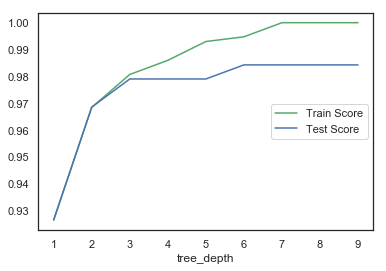

In [147]:
train_score_list =[]
test_score_list=[]
for i in range(1,X_reduced_train.shape[1]): 
    dtree_pca = DecisionTreeClassifier(max_depth=i,random_state=0)
    dtree_pca.fit(X_reduced_train,y_train)
    train_score_list.append(dtree_pca.score(X_reduced_train,y_train))
    test_score_list.append(dtree_pca.score(X_reduced_test, y_test))

%matplotlib inline

plt.plot(np.array(range(1,X_reduced_train.shape[1])), train_score_list, c = 'g', label = 'Train Score')
plt.plot(np.array(range(1,X_reduced_train.shape[1])), test_score_list, c = 'b', label = 'Test Score')
plt.legend(loc = 5)
plt.xlabel('tree_depth')

In [148]:

dtree_pca = DecisionTreeClassifier(max_depth=6, random_state=0)

scores = cross_val_score(dtree_pca, X_reduced_train, y_train,cv=10,scoring='recall')
print("Recall Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

scores = cross_val_score(dtree_pca, X_reduced_test, y_test,cv=10,scoring='recall')
print(" Recall Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

scores = cross_val_score(dtree_pca, X_reduced_train, y_train,cv=10)
print("Accuracy Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

scores = cross_val_score(dtree_pca, X_reduced_test, y_test,cv=10)
print(" Accuracy Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Recall Cross-validation scores: [0.95652174 0.95652174 0.95652174 1.         0.91304348 0.95652174
 1.         0.95652174 0.95652174 0.91304348]
Average cross-validation score: 0.96
 Recall Cross-validation scores: [1.         0.875      0.875      0.85714286 1.         1.
 1.         1.         0.85714286 1.        ]
Average cross-validation score: 0.95
Accuracy Cross-validation scores: [0.96551724 0.98245614 0.98245614 0.96491228 0.94736842 0.98245614
 0.98245614 0.98245614 0.96491228 0.9122807 ]
Average cross-validation score: 0.97
 Accuracy Cross-validation scores: [0.95       0.95       0.75       0.94736842 1.         1.
 0.94736842 0.94736842 0.94444444 1.        ]
Average cross-validation score: 0.94


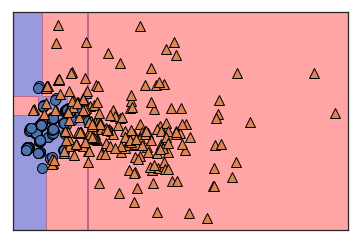

In [149]:
import mglearn
X_b = X_reduced_train[:,[0,4]]
y_b = y_train.values.ravel()[:]

dtree_p = DecisionTreeClassifier(max_depth=6, random_state=0)
dtree_p.fit(X_b, y_b)

mglearn.plots.plot_2d_separator(dtree_p, X_b, fill=True, eps=0.5, alpha=.4)
mglearn.discrete_scatter(X_b[:, 0], X_b[:, 1], y_b)

### KNN classifier with PCA

In [150]:
param_grid = {'n_neighbors': [2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=10, return_train_score=True,scoring='recall')

grid_search.fit(X_reduced_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'n_neighbors': 3}
Best cross-validation score: 0.95


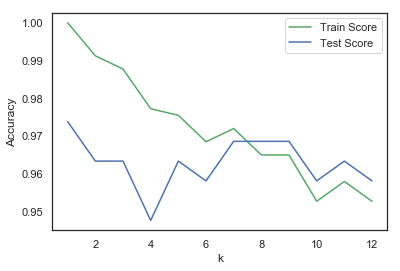

In [151]:
train_score_array = []
test_score_array = []

for k in range(1,13):
    knn_pca = KNeighborsClassifier(k)
    knn_pca.fit(X_reduced_train, y_train)
    train_score_array.append(knn_pca.score(X_reduced_train, y_train))
    test_score_array.append(knn_pca.score(X_reduced_test, y_test))

x_axis = range(1,13)
%matplotlib inline
plt.plot(x_axis, train_score_array, label = 'Train Score', c = 'g')
plt.plot(x_axis, test_score_array, label = 'Test Score', c='b')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()

In [152]:
from sklearn.model_selection import cross_val_score

knn_pca = KNeighborsClassifier(n_neighbors=3)
knn_pca.fit(X_reduced_train, y_train)
scores = cross_val_score(knn_pca, X_reduced_train, y_train,cv=10,scoring='recall')
print("Recall Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

scores = cross_val_score(knn_pca, X_reduced_test, y_test,cv=10,scoring='recall')
print(" Recall Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))


scores = cross_val_score(knn_pca, X_reduced_train, y_train,cv=10)
print("Accuracy Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

scores = cross_val_score(knn_pca, X_reduced_test, y_test,cv=10)
print("Accuracy Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Recall Cross-validation scores: [1.         0.95652174 1.         0.95652174 0.95652174 0.95652174
 0.95652174 0.95652174 0.91304348 0.86956522]
Average cross-validation score: 0.95
 Recall Cross-validation scores: [1.         0.625      0.625      0.85714286 1.         1.
 1.         1.         0.71428571 1.        ]
Average cross-validation score: 0.88
Accuracy Cross-validation scores: [1.         0.98245614 1.         0.98245614 0.96491228 0.96491228
 0.96491228 0.96491228 0.94736842 0.92982456]
Average cross-validation score: 0.97
Accuracy Cross-validation scores: [1.         0.85       0.8        0.94736842 1.         1.
 1.         0.94736842 0.88888889 1.        ]
Average cross-validation score: 0.94


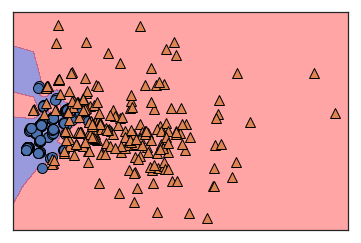

In [153]:
import mglearn
X_b = X_reduced_train[:,[0,4]]
y_b = y_train.values.ravel()[:]

knn_p = KNeighborsClassifier(n_neighbors=3)
knn_p.fit(X_b, y_b)

mglearn.plots.plot_2d_separator(knn_p, X_b, fill=True, eps=0.5, alpha=.4)
mglearn.discrete_scatter(X_b[:, 0], X_b[:, 1], y_b)

### Logistic Regression with PCA

In [154]:
param_grid = {'C':[0.001, 0.01, 0.1,1,10,100],'penalty':['l1','l2'] }
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=10, return_train_score=True,scoring='recall')

grid_search.fit(X_reduced_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 10, 'penalty': 'l1'}
Best cross-validation score: 0.98


In [155]:
from sklearn.linear_model import LogisticRegression

c_range = [0.001, 0.01, 0.1, 1, 10, 100,1000]
train_score_l1 = []
train_score_l2 = []
test_score_l1 = []
test_score_l2 = []

for c in c_range:
    log_l1_pca = LogisticRegression(penalty = 'l1', C = c)
    log_l2_pca = LogisticRegression(penalty = 'l2', C = c)
    log_l1_pca.fit(X_reduced_train, y_train)
    log_l2_pca.fit(X_reduced_train, y_train)
    train_score_l1.append(log_l1_pca.score(X_reduced_train, y_train))
    train_score_l2.append(log_l2_pca.score(X_reduced_train, y_train))
    test_score_l1.append(log_l1_pca.score(X_reduced_test, y_test))
    test_score_l2.append(log_l2_pca.score(X_reduced_test, y_test))

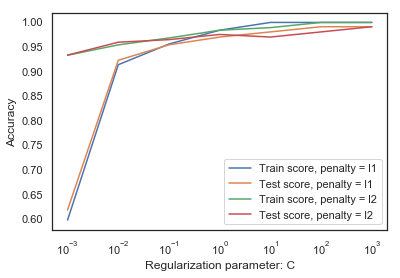

In [156]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(c_range, train_score_l1, label = 'Train score, penalty = l1')
plt.plot(c_range, test_score_l1, label = 'Test score, penalty = l1')
plt.plot(c_range, train_score_l2, label = 'Train score, penalty = l2')
plt.plot(c_range, test_score_l2, label = 'Test score, penalty = l2')
plt.legend()
plt.xlabel('Regularization parameter: C')
plt.ylabel('Accuracy')
plt.xscale('log')

In [157]:
from sklearn.model_selection import cross_val_score

logit_pca=LogisticRegression(C=10,penalty='l1')
scores = cross_val_score(logit_pca, X_reduced_train, y_train,cv=10,scoring='recall')
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

scores = cross_val_score(logit_pca, X_reduced_test, y_test,cv=10,scoring='recall')
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

scores = cross_val_score(logit_pca, X_reduced_train, y_train,cv=10)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

scores = cross_val_score(logit_pca, X_reduced_test, y_test,cv=10)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [1.         0.95652174 1.         1.         1.         1.
 1.         0.91304348 1.         0.95652174]
Average cross-validation score: 0.98
Cross-validation scores: [1.         0.875      0.875      1.         1.         1.
 1.         1.         0.71428571 1.        ]
Average cross-validation score: 0.95
Cross-validation scores: [1.         0.98245614 1.         1.         0.98245614 1.
 1.         0.96491228 1.         0.96491228]
Average cross-validation score: 0.99
Cross-validation scores: [1.         0.95       0.85       1.         1.         1.
 0.94736842 0.94736842 0.88888889 1.        ]
Average cross-validation score: 0.96


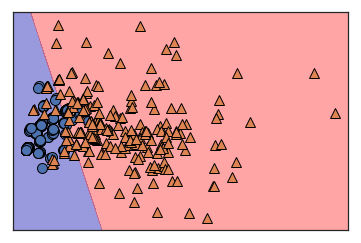

In [158]:
import mglearn
X_b = X_reduced_train[:,[0,4]]
y_b = y_train.values.ravel()[:]

l1=LogisticRegression(C=10,penalty='l1').fit(X_b,y_b)

mglearn.plots.plot_2d_separator(l1, X_b, fill=True, eps=0.5, alpha=.4)
mglearn.discrete_scatter(X_b[:, 0], X_b[:, 1], y_b)

### Linear SVC with PCA

In [159]:
param_grid = {'C': [0.001,0.01, 0.1, 1, 10, 100,1000]}
grid_search = GridSearchCV(LinearSVC(), param_grid, cv=10, return_train_score=True,scoring='recall')

grid_search.fit(X_reduced_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 100}
Best cross-validation score: 0.98


Text(0.5, 0, 'C')

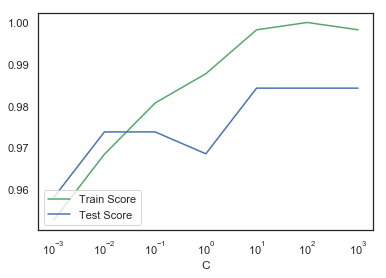

In [160]:
x_range = [0.001,0.01, 0.1, 1, 10, 100,1000]
train_score_list = []
test_score_list = []

for c in x_range: 
    linear_svm_pca = LinearSVC(C=c)
    linear_svm_pca.fit(X_reduced_train,y_train)
    train_score_list.append(linear_svm_pca.score(X_reduced_train,y_train))
    test_score_list.append(linear_svm_pca.score(X_reduced_test, y_test))
%matplotlib inline
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'C')

In [161]:
from sklearn.model_selection import cross_val_score
linear_svc_pca=LinearSVC(C=10)
scores = cross_val_score(linear_svc_pca, X_reduced_train, y_train,cv=10,scoring='recall')
print("Recall Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

scores = cross_val_score(linear_svc_pca, X_reduced_test, y_test,cv=10,scoring='recall')
print("Recall Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

scores = cross_val_score(linear_svc_pca, X_reduced_train, y_train,cv=10)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

scores = cross_val_score(linear_svc_pca, X_reduced_test, y_test,cv=10)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Recall Cross-validation scores: [1.         0.95652174 1.         1.         1.         1.
 1.         0.91304348 1.         0.91304348]
Average cross-validation score: 0.98
Recall Cross-validation scores: [1.         1.         0.875      1.         1.         1.
 1.         1.         0.71428571 1.        ]
Average cross-validation score: 0.96
Cross-validation scores: [1.         0.98245614 1.         1.         1.         1.
 1.         0.96491228 1.         0.96491228]
Average cross-validation score: 0.99
Cross-validation scores: [1.         1.         0.85       1.         1.         1.
 1.         0.94736842 0.88888889 1.        ]
Average cross-validation score: 0.97


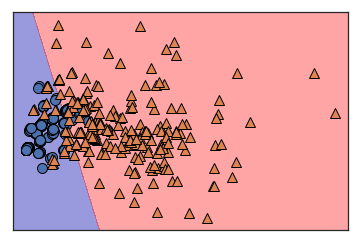

In [162]:
import mglearn
X_b = X_reduced_train[:,[0,4]]
y_b = y_train.values.ravel()[:]

linear_svm_p = LinearSVC(C=10).fit(X_b,y_b)

mglearn.plots.plot_2d_separator(linear_svm_p, X_b, fill=True, eps=0.5, alpha=.4)
mglearn.discrete_scatter(X_b[:, 0], X_b[:, 1], y_b)

### SVM with Kernels and PCA

In [163]:
#rbf

param_grid = {'C': [0.001, 0.01, .1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
             }
print("Parameter grid:\n{}".format(param_grid))
grid_search = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=10, return_train_score=True
                          )

grid_search.fit(X_reduced_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Parameter grid:
{'C': [0.001, 0.01, 0.1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
Best parameters: {'C': 100, 'gamma': 0.1}
Best cross-validation score: 0.99


In [164]:
from sklearn.model_selection import cross_val_score

svm_rbf_pca=SVC(kernel='rbf',gamma=.1,C=100)
scores = cross_val_score(svm_rbf_pca, X_reduced_train, y_train,cv=10,scoring='recall')
print("Recall Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

scores = cross_val_score(svm_rbf_pca, X_reduced_test, y_test,cv=10,scoring='recall')
print(" Recall Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

scores = cross_val_score(svm_rbf_pca, X_reduced_train, y_train,cv=10)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

scores = cross_val_score(svm_rbf_pca, X_reduced_test, y_test,cv=10)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Recall Cross-validation scores: [1.         0.95652174 1.         1.         0.95652174 0.95652174
 0.95652174 1.         1.         0.95652174]
Average cross-validation score: 0.98
 Recall Cross-validation scores: [1.         1.         0.875      0.85714286 1.         1.
 1.         1.         0.85714286 1.        ]
Average cross-validation score: 0.96
Cross-validation scores: [1.         0.98245614 1.         1.         0.98245614 0.98245614
 0.98245614 1.         1.         0.96491228]
Average cross-validation score: 0.99
Cross-validation scores: [1.         1.         0.85       0.94736842 1.         1.
 0.94736842 0.94736842 0.94444444 1.        ]
Average cross-validation score: 0.96


Text(0.5, 0, 'C')

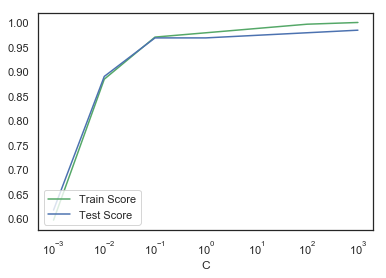

In [165]:
x_range = [0.001,0.01, 0.1, 1, 10, 100,1000]
train_score_list = []
test_score_list = []

for c in x_range: 
    rbf_pca = SVC(C=c,kernel='rbf',gamma=.1)
    rbf_pca.fit(X_train,y_train)
    train_score_list.append(rbf_pca.score(X_train,y_train))
    test_score_list.append(rbf_pca.score(X_test, y_test))
%matplotlib inline
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'C')

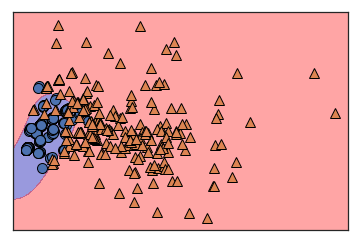

In [166]:
import mglearn
X_b = X_reduced_train[:,[0,4]]
y_b = y_train.values.ravel()[:]

rbf_p = SVC(C=100,kernel='rbf',gamma=.1).fit(X_b,y_b)

mglearn.plots.plot_2d_separator(rbf_p, X_b, fill=True, eps=0.5, alpha=.4)
mglearn.discrete_scatter(X_b[:, 0], X_b[:, 1], y_b)

### Poly SVM with PCA

In [167]:

param_grid = {'C': [0.0001,0.001, 0.01, .1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
             }
print("Parameter grid:\n{}".format(param_grid))
grid_search = GridSearchCV(SVC(kernel='poly'), param_grid, cv=10, return_train_score=True,scoring='recall')

grid_search.fit(X_reduced_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Parameter grid:
{'C': [0.0001, 0.001, 0.01, 0.1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
Best parameters: {'C': 0.001, 'gamma': 10}
Best cross-validation score: 0.95


In [168]:
from sklearn.model_selection import cross_val_score

svm_poly_pca=SVC(kernel='poly',gamma=10,C=.001)
scores = cross_val_score(svm_poly_pca, X_reduced_train, y_train,cv=10,scoring='recall')
print("Recall Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

scores = cross_val_score(svm_poly_pca, X_reduced_test, y_test,cv=10,scoring='recall')
print(" Recall Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

scores = cross_val_score(svm_poly_pca, X_reduced_train, y_train,cv=10)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

scores = cross_val_score(svm_poly_pca, X_reduced_test, y_test,cv=10)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Recall Cross-validation scores: [1.         0.91304348 0.91304348 1.         1.         0.95652174
 0.86956522 0.91304348 1.         0.95652174]
Average cross-validation score: 0.95
 Recall Cross-validation scores: [0.75       0.75       0.75       0.85714286 1.         1.
 0.85714286 1.         0.85714286 1.        ]
Average cross-validation score: 0.88
Cross-validation scores: [1.         0.96491228 0.96491228 0.98245614 1.         0.98245614
 0.94736842 0.96491228 0.96491228 0.98245614]
Average cross-validation score: 0.98
Cross-validation scores: [0.9        0.9        0.8        0.94736842 1.         1.
 0.89473684 1.         0.94444444 1.        ]
Average cross-validation score: 0.94


Text(0.5, 0, 'C')

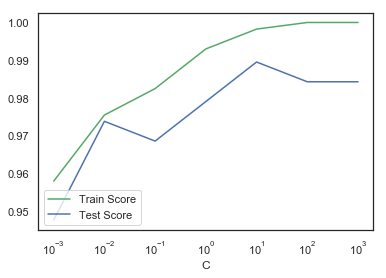

In [169]:
x_range = [0.001,0.01, 0.1, 1, 10, 100,1000]
train_score_list = []
test_score_list = []

for c in x_range: 
    poly_svm_pca = SVC(C=c,kernel='poly',degree=1,gamma=10)
    poly_svm_pca.fit(X_reduced_train,y_train)
    train_score_list.append(poly_svm_pca.score(X_reduced_train,y_train))
    test_score_list.append(poly_svm_pca.score(X_reduced_test, y_test))
%matplotlib inline
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'C')

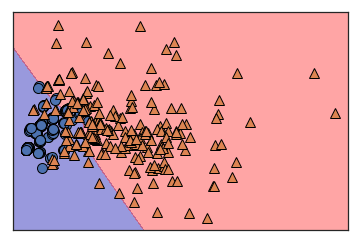

In [170]:
import mglearn
X_b = X_reduced_train[:,[0,4]]
y_b = y_train.values.ravel()[:]

poly_P = SVC(C=.01,kernel='poly',gamma=10).fit(X_b,y_b)

mglearn.plots.plot_2d_separator(poly_P, X_b, fill=True, eps=0.5, alpha=.4)
mglearn.discrete_scatter(X_b[:, 0], X_b[:, 1], y_b)

### Linear SVM with PCA

In [171]:

param_grid = {'C': [0.0001,0.001, 0.01, .1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
             }
print("Parameter grid:\n{}".format(param_grid))
grid_search = GridSearchCV(SVC(kernel='linear'), param_grid, cv=10, return_train_score=True,scoring='recall')

grid_search.fit(X_reduced_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Parameter grid:
{'C': [0.0001, 0.001, 0.01, 0.1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
Best parameters: {'C': 100, 'gamma': 0.001}
Best cross-validation score: 0.97


In [172]:
from sklearn.model_selection import cross_val_score

svm_lin_pca=SVC(kernel='linear',gamma=.001,C=100)
scores = cross_val_score(svm_lin_pca, X_reduced_train, y_train,cv=10,scoring='recall')
print("Recall Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

scores = cross_val_score(svm_lin_pca, X_reduced_test, y_test,cv=10,scoring='recall')
print(" Recall Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

scores = cross_val_score(svm_lin_pca, X_reduced_train, y_train,cv=10)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

scores = cross_val_score(svm_lin_pca, X_reduced_test, y_test,cv=10)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Recall Cross-validation scores: [1.         0.95652174 1.         0.95652174 0.91304348 1.
 1.         0.95652174 1.         0.95652174]
Average cross-validation score: 0.97
 Recall Cross-validation scores: [1.         1.         0.875      0.85714286 1.         1.
 1.         1.         0.85714286 1.        ]
Average cross-validation score: 0.96
Cross-validation scores: [1.         0.98245614 1.         0.98245614 0.96491228 1.
 1.         0.98245614 1.         0.98245614]
Average cross-validation score: 0.99
Cross-validation scores: [0.95       1.         0.85       0.94736842 1.         1.
 1.         1.         0.94444444 1.        ]
Average cross-validation score: 0.97


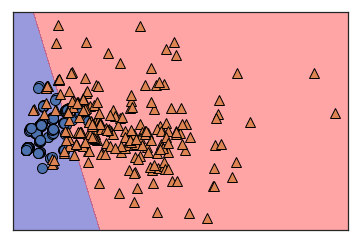

In [173]:
import mglearn
X_b = X_reduced_train[:,[0,4]]
y_b = y_train.values.ravel()[:]

linear_s_p = SVC(C=100,kernel='linear',gamma=0.01).fit(X_b,y_b)

mglearn.plots.plot_2d_separator(linear_s_p, X_b, fill=True, eps=0.5, alpha=.4)
mglearn.discrete_scatter(X_b[:, 0], X_b[:, 1], y_b)

In [174]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, auc, classification_report, log_loss, precision_score, recall_score, roc_auc_score, roc_curve,matthews_corrcoef
def score_print(y,y_pred,count):
    b=[]
    b.append(confusion_matrix(y,y_pred[count]))
    b.append(accuracy_score(y,y_pred[count]))
    b.append(precision_score(y,y_pred[count]))
    b.append(recall_score(y,y_pred[count]))
    b.append(f1_score(y,y_pred[count]))
    fpr, tpr, thresholds = roc_curve(y, y_pred[count])
    b.append(auc(fpr, tpr))
    return b

In [175]:


dtree_pca = DecisionTreeClassifier(max_depth=6, random_state=0)
dtree_pca.fit(X_reduced_train,y_train)
knn_pca=KNeighborsClassifier(n_neighbors=3)
knn_pca.fit(X_reduced_train,y_train)
logit_pca=LogisticRegression(C=10,penalty='l1')
logit_pca.fit(X_reduced_train,y_train)
svm_lin_pca=SVC(kernel='linear',gamma=.001,C=100)
svm_lin_pca.fit(X_reduced_train,y_train)

svm_poly_pca=SVC(kernel='poly',gamma=10,C=.001)
svm_poly_pca.fit(X_reduced_train,y_train)

svm_rbf_pca=SVC(kernel='rbf',gamma=.1,C=100)
svm_rbf_pca.fit(X_reduced_train,y_train)
linear_svc_pca=LinearSVC(C=10)
linear_svc_pca.fit(X_reduced_train,y_train)

models_pca=[dtree_pca,knn_pca,logit_pca,linear_svc_pca,svm_lin_pca,svm_poly_pca,svm_rbf_pca]
y_pred=[]
count=0
scores=[]
for i in models_pca:
    print(count)
    y_pred.append(i.predict(pca.transform(X_test)))
    scores.append(score_print(y_test,y_pred,count))
    count=count+1

0
1
2
3
4
5
6


In [176]:
pca_models=pd.DataFrame()
pca_models['models']=['dtree_pca','knn_pca','logit_pca','linear_svc_pca','svm_lin_pca','svm_poly_pca','svm_rbf_pca']
pca_models=pd.concat([pca_models,pd.DataFrame(scores)], axis=1)
pca_models.columns=['models','confusion_matrix','accuracy_score','precision_score','recall_score','f1_score','auc']
pca_models

,models,confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,auc
0,dtree_pca,"[[117, 1], [2, 71]]",0.984293,0.986111,0.972603,0.979310,0.982064
1,knn_pca,"[[118, 0], [7, 66]]",0.963351,1.000000,0.904110,0.949640,0.952055
2,logit_pca,"[[117, 1], [3, 70]]",0.979058,0.985915,0.958904,0.972222,0.975215
3,linear_svc_pca,"[[118, 0], [3, 70]]",0.984293,1.000000,0.958904,0.979021,0.979452
4,svm_lin_pca,"[[118, 0], [2, 71]]",0.989529,1.000000,0.972603,0.986111,0.986301
5,svm_poly_pca,"[[118, 0], [6, 67]]",0.968586,1.000000,0.917808,0.957143,0.958904
6,svm_rbf_pca,"[[118, 0], [5, 68]]",0.973822,1.000000,0.931507,0.964539,0.965753


In [177]:
dtree = DecisionTreeClassifier(max_depth=8, random_state=0)
dtree.fit(X_train,y_train)
knn= KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
logit=LogisticRegression(C=100,penalty='l1')
logit.fit(X_train,y_train)
linear_svc = LinearSVC(C=10)
linear_svc.fit(X_train,y_train)
svm_rbf=SVC(kernel='rbf',gamma=.1,C=100,probability=True)
svm_rbf.fit(X_train,y_train)
svm_poly=SVC(kernel='poly',gamma=10,C=100,degree=1,probability=True)
svm_poly.fit(X_train,y_train)
svm_lin=SVC(kernel='linear',C=10,gamma=.001,probability=True)
svm_lin.fit(X_train,y_train)

models=[dtree,knn,logit,linear_svc,svm_lin,svm_poly,svm_rbf]
y_pred=[]
count=0
scores=[]
for i in models:
    print(count)
    y_pred.append(i.predict(X_test))
    scores.append(score_print(y_test,y_pred,count))
    count=count+1


0
1
2
3
4
5
6


In [178]:
simple_models=pd.DataFrame()
simple_models['models']=['dtree','knn','logit','linear','svm_lin','svm_poly','svm_rbf']
simple_models=pd.concat([simple_models,pd.DataFrame(scores)], axis=1)
simple_models.columns=['models','confusion_matrix','accuracy_score','precision_score','recall_score','f1_score','auc']
simple_models

,models,confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,auc
0,dtree,"[[114, 4], [1, 72]]",0.973822,0.947368,0.986301,0.966443,0.976202
1,knn,"[[118, 0], [7, 66]]",0.963351,1.000000,0.904110,0.949640,0.952055
2,logit,"[[116, 2], [1, 72]]",0.984293,0.972973,0.986301,0.979592,0.984676
3,linear,"[[118, 0], [3, 70]]",0.984293,1.000000,0.958904,0.979021,0.979452
4,svm_lin,"[[117, 1], [3, 70]]",0.979058,0.985915,0.958904,0.972222,0.975215
5,svm_poly,"[[116, 2], [1, 72]]",0.984293,0.972973,0.986301,0.979592,0.984676
6,svm_rbf,"[[118, 0], [4, 69]]",0.979058,1.000000,0.945205,0.971831,0.972603


In [179]:
concat_simple_pca=pd.concat([pca_models.transpose(),simple_models.transpose()],axis=1)
concat_simple_pca.columns=['dtree_pca','knn_pca','logit_pca','linear_svc_pca','svm_lin_pca','svm_poly_pca','svm_rbf_pca','dtree','knn','logit','linear','svm_lin','svm_poly','svm_rbf']

concat_simple_pca.drop(['models'],inplace=True)


In [180]:
concat_clf=concat_simple_pca.sort_index(axis=1)
concat_clf

,dtree,dtree_pca,knn,knn_pca,linear,linear_svc_pca,logit,logit_pca,svm_lin,svm_lin_pca,svm_poly,svm_poly_pca,svm_rbf,svm_rbf_pca
confusion_matrix,"[[114, 4], [1, 72]]","[[117, 1], [2, 71]]","[[118, 0], [7, 66]]","[[118, 0], [7, 66]]","[[118, 0], [3, 70]]","[[118, 0], [3, 70]]","[[116, 2], [1, 72]]","[[117, 1], [3, 70]]","[[117, 1], [3, 70]]","[[118, 0], [2, 71]]","[[116, 2], [1, 72]]","[[118, 0], [6, 67]]","[[118, 0], [4, 69]]","[[118, 0], [5, 68]]"
accuracy_score,0.973822,0.984293,0.963351,0.963351,0.984293,0.984293,0.984293,0.979058,0.979058,0.989529,0.984293,0.968586,0.979058,0.973822
precision_score,0.947368,0.986111,1,1,1,1,0.972973,0.985915,0.985915,1,0.972973,1,1,1
recall_score,0.986301,0.972603,0.90411,0.90411,0.958904,0.958904,0.986301,0.958904,0.958904,0.972603,0.986301,0.917808,0.945205,0.931507
f1_score,0.966443,0.97931,0.94964,0.94964,0.979021,0.979021,0.979592,0.972222,0.972222,0.986111,0.979592,0.957143,0.971831,0.964539
auc,0.976202,0.982064,0.952055,0.952055,0.979452,0.979452,0.984676,0.975215,0.975215,0.986301,0.984676,0.958904,0.972603,0.965753


### From the above table we can say that compare to regression, classification does not change much with PCA and without PCA models.So PCA hs more effect on data while doing regression models rather than classification models.

### Neural Networks for Classification


In [181]:
X = df[['District', 'Sector_score', 'PARA_A', 'Score_A', 'PARA_B', 'Score_B',
       'numbers', 'Money_Value', 'History', 
       'MONEY_Marks', 'Loss', 'History_score']]
y = df[['Risk_x']]

In [182]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

def build_model_clf():
    model = keras.Sequential([
    layers.Dense(64, activation=tf.nn.relu, input_dim=12),
    layers.Dense(64, activation=tf.nn.relu),
    layers.Dense(1, activation = 'sigmoid')
  ])



    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[tf.keras.metrics.Recall(),'accuracy'])
    return model


In [183]:
build_model_clf()

In [184]:
build_model_clf().summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 64)                832       
_________________________________________________________________
dense_7 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 65        
Total params: 5,057
Trainable params: 5,057
Non-trainable params: 0
_________________________________________________________________


In [186]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
X_train_org,X_test_org,y_train,y_test=train_test_split(X,y,random_state=0)

scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train_org)
X_test=scaler.transform(X_test_org)

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=30)

history_clf = build_model_clf().fit(X_train, y_train,  epochs=1000, validation_split = 0.2, verbose=1, callbacks=[early_stop])

Train on 456 samples, validate on 115 samples
Epoch 1/1000
456/456 [==============================] - 1s 1ms/sample - loss: 0.6281 - recall_2: 0.9462 - acc: 0.7281 - val_loss: 0.5713 - val_recall_2: 0.9773 - val_acc: 0.8348
Epoch 2/1000
456/456 [==============================] - 0s 125us/sample - loss: 0.5152 - recall_2: 0.9677 - acc: 0.8355 - val_loss: 0.4635 - val_recall_2: 0.9545 - val_acc: 0.8783
Epoch 3/1000
456/456 [==============================] - 0s 145us/sample - loss: 0.4101 - recall_2: 0.9301 - acc: 0.8947 - val_loss: 0.3648 - val_recall_2: 0.9091 - val_acc: 0.9130
Epoch 4/1000
456/456 [==============================] - 0s 123us/sample - loss: 0.3173 - recall_2: 0.9032 - acc: 0.9276 - val_loss: 0.2885 - val_recall_2: 0.9091 - val_acc: 0.9217
Epoch 5/1000
456/456 [==============================] - 0s 145us/sample - loss: 0.2460 - recall_2: 0.9086 - acc: 0.9298 - val_loss: 0.2322 - val_recall_2: 0.9091 - val_acc: 0.9217
Epoch 6/1000
456/456 [==============================] - 

456/456 [==============================] - 0s 81us/sample - loss: 0.0179 - recall_2: 0.9892 - acc: 0.9934 - val_loss: 0.0770 - val_recall_2: 0.9773 - val_acc: 0.9739
Epoch 92/1000
456/456 [==============================] - 0s 83us/sample - loss: 0.0170 - recall_2: 0.9839 - acc: 0.9912 - val_loss: 0.0756 - val_recall_2: 0.9773 - val_acc: 0.9739
Epoch 93/1000
456/456 [==============================] - 0s 90us/sample - loss: 0.0170 - recall_2: 0.9892 - acc: 0.9934 - val_loss: 0.0790 - val_recall_2: 0.9773 - val_acc: 0.9739
Epoch 94/1000
456/456 [==============================] - 0s 81us/sample - loss: 0.0164 - recall_2: 0.9892 - acc: 0.9934 - val_loss: 0.0754 - val_recall_2: 0.9773 - val_acc: 0.9739
Epoch 95/1000
456/456 [==============================] - 0s 90us/sample - loss: 0.0164 - recall_2: 0.9892 - acc: 0.9934 - val_loss: 0.0752 - val_recall_2: 0.9773 - val_acc: 0.9739
Epoch 96/1000
456/456 [==============================] - 0s 101us/sample - loss: 0.0173 - recall_2: 0.9892 - acc: 

In [187]:
hist = pd.DataFrame(history_clf.history)
hist['epoch'] = history_clf.epoch
hist.tail()

,loss,recall_2,acc,val_loss,val_recall_2,val_acc,epoch
171,0.007890,0.994624,0.997807,0.061756,0.977273,0.973913,171
172,0.007956,0.994624,0.997807,0.057648,0.977273,0.982609,172
173,0.007690,0.994624,0.997807,0.059649,0.977273,0.973913,173
174,0.007549,0.994624,0.997807,0.059265,0.977273,0.982609,174
175,0.007239,0.994624,0.997807,0.059301,0.977273,0.973913,175


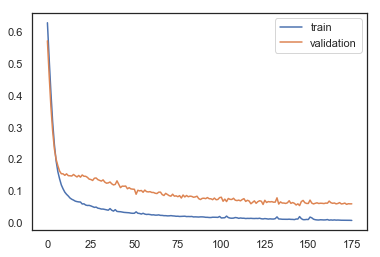

In [188]:
import matplotlib.pyplot as plt
plt.plot(history_clf.history['loss'], label='train')
plt.plot(history_clf.history['val_loss'], label='validation')
plt.legend()
plt.show()

In [190]:
build_model_clf().evaluate(X_train,y_train)


571/571 [==============================] - 0s 312us/sample - loss: 0.6746 - recall_3: 0.9913 - acc: 0.4028


[0.6746057172790301, 0.99130434, 0.4028021]

In [191]:
build_model_clf().evaluate(X_test,y_test)


191/191 [==============================] - 0s 733us/sample - loss: 0.6896 - recall_4: 0.9726 - acc: 0.3927


[0.6895519978712991, 0.9726027, 0.39267015]

In [192]:
from sklearn.metrics import recall_score
y_pred = build_model_clf().predict(X_test)


In [193]:
y_test_pred = np.where(y_pred >= 0.5, 1, 0)

In [194]:
recall_score(y_test,y_test_pred.flatten())

0.2602739726027397